# Lluis Escolano

## Research question/interests

I will use the metric of EDA in order to investigate buying habits and trends across different countries.

## Imports

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions2

## The data:
this is the original data presented during

In [94]:
data1 = pd.read_csv("../data/raw/data.csv", encoding= 'unicode_escape')
data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [95]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Unfortunately the original data set contains a multitude of missing data, mainly when it comes to descriptions and unit prices, hence, it is necessary to clean the data set from the empty values. Fortunately we already did this. Still adjust the InvoiceDate to a more convenient format

In [96]:
data = pd.read_csv("../data/processed/new_data.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Method chaining
used method chaining to change the format of the InvoiceDate and also added a column for TotalCost that highlights the total cost of the order in question

In [97]:
import project_functions2
data = project_functions2.load_and_process(data)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
406218,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
406219,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
406220,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
406221,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406223 entries, 0 to 406222
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406223 non-null  object        
 1   StockCode    406223 non-null  object        
 2   Description  406223 non-null  object        
 3   Quantity     406223 non-null  int64         
 4   InvoiceDate  406223 non-null  datetime64[ns]
 5   UnitPrice    406223 non-null  float64       
 6   CustomerID   406223 non-null  float64       
 7   Country      406223 non-null  object        
 8   TotalCost    406223 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.9+ MB


## Variables
To further investigate this data set, it is necessary to first declare what each variable represent
* InvoiceNo: A 6-digit invoice number
* StockCode: A 5-character identifier used for stock purposes
* Description: A brief description of the item
* Quantity: Indicated the quantity/amount ordered
* InvoiceDate: Indicates the date the order was placed
* UnitPrice: Indicates the individual value of the item
* CustomerID: A 5-digit number used for identifying each customer/individual
* Country: Holds the name of the country from which the order was made

### Added variables
For ease of use, I will add multiple time related columns in order to more easily analyze customer trends

In [99]:
data.insert(loc=2, column='year_month', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))
data.insert(loc=3, column='month', value=data.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
data.insert(loc=4, column='day', value=(data.InvoiceDate.dt.dayofweek)+1)
data.insert(loc=5, column='hour', value=data.InvoiceDate.dt.hour)
data.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Discovering time patterns in the data
### Monthly buying habits of customers

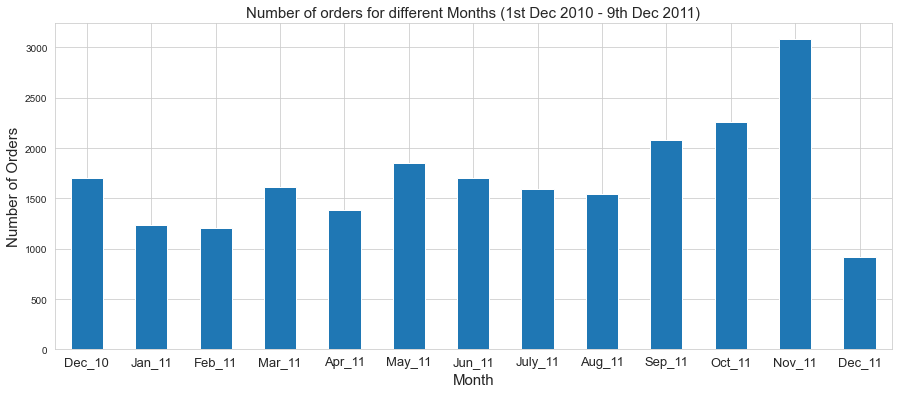

In [100]:
color = sns.color_palette()
ax = data.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

As you can see, November is the most popular month which can be assumed to be related to Christmas being arround the corner which boosts the sales of gifts (which the company sells)

### Daily buying habits of customers

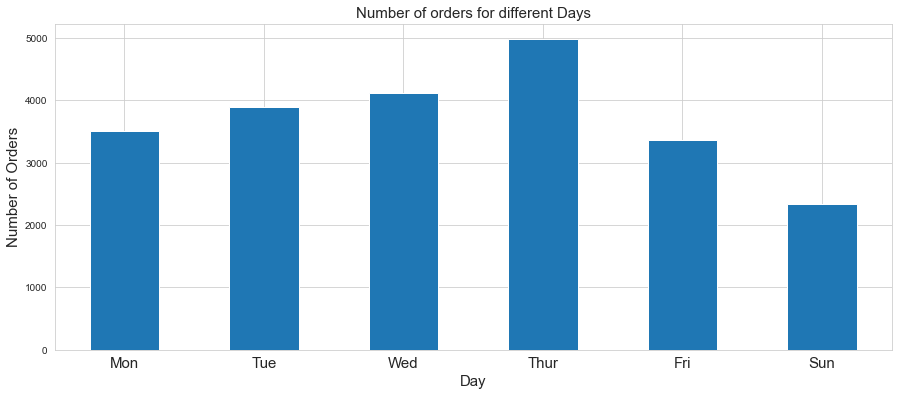

In [101]:
ax = data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

- Sales tend to increase from Monday to Thursday and drop on the weekend, we can deduce that the reason for this is that most people tend to celebrate on weekend and considering there is a time for delivery of the gift, it would make sense to order the gifts from beforehand
- Strangely the company does not sell anything on saturday and although it could be due to the company closing, it seems strange as it an online retailer

### Hourly habits

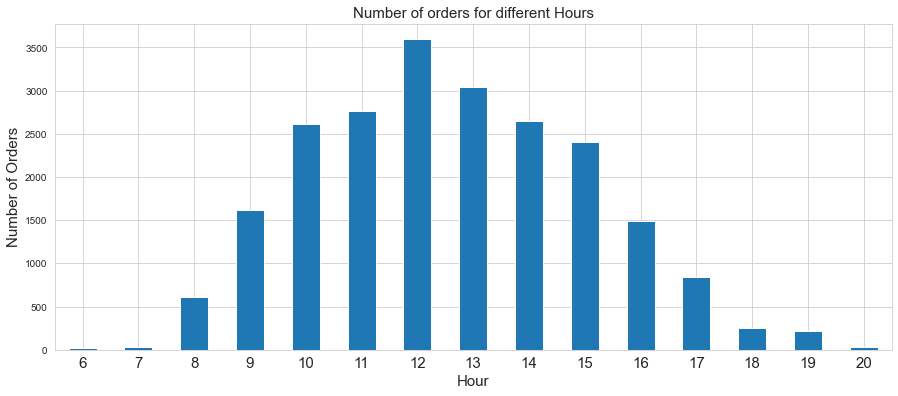

In [102]:
ax = data.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

- There is a peak in the sales in the afternoon (12-13) during lunch time, further more in the UK, there is a legally enforced 20minute lunch break. so we can infer that most of the purchases happen during this break.

## Separating the data by countries
In order to investigate trends from costumers, it is necessary to first separate them between countries as this allows us to decrease unpredictability factors such as culture, religion and popular holidays as they have a tendency to vary greatly between countries.

To first do this segmentation, it is first necessary to find out how many countries are considered in the data frame:

In [103]:
countries = pd.DataFrame({"Countries": data["Country"].unique()})
countries

,Countries
0,United Kingdom
1,France
2,Australia
3,Netherlands
4,Germany
5,Norway
6,EIRE
7,Switzerland
8,Spain
9,Poland


### UK

In [104]:
uk = data[data["Country"]=="United Kingdom"]
uk.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,361307.000000,361307.000000,361307.000000,361307.000000,361307.000000,361307.000000,361307.000000,361307.000000
mean,201100.852430,7.638072,3.634615,12.818484,11.078609,3.258486,15547.903644,18.705629
std,24.187252,3.420420,1.949978,2.255339,263.336676,70.710511,1594.434595,452.274930
min,201012.000000,1.000000,1.000000,6.000000,-80995.000000,0.000000,12346.000000,-168469.600000
25%,201104.000000,5.000000,2.000000,11.000000,2.000000,1.250000,14194.000000,3.750000
50%,201107.000000,9.000000,3.000000,13.000000,4.000000,1.950000,15514.000000,10.200000
75%,201110.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16931.000000,17.700000
max,201112.000000,12.000000,7.000000,20.000000,80995.000000,38970.000000,18287.000000,168469.600000


#### Revenue with time

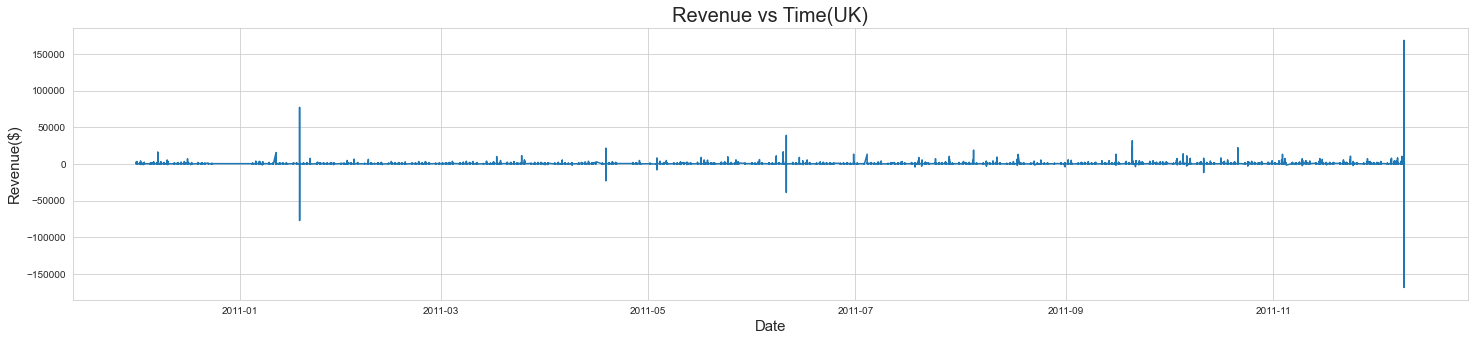

In [105]:
ukTR = uk.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(ukTR.index,ukTR)
plt.title("Revenue vs Time(UK)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()


### France

In [106]:
france = data[data["Country"]=="France"]
france.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000,8487.000000
mean,201102.330152,7.502769,3.446801,12.077295,12.937434,5.050670,12678.027100,23.169370
std,21.360824,3.500239,1.655013,2.361689,21.464251,80.237449,276.799294,117.654172
min,201012.000000,1.000000,1.000000,7.000000,-250.000000,0.000000,12413.000000,-8322.120000
25%,201104.000000,5.000000,2.000000,10.000000,5.000000,1.250000,12571.000000,10.500000
50%,201108.000000,9.000000,3.000000,12.000000,10.000000,1.790000,12674.000000,16.500000
75%,201110.000000,11.000000,5.000000,14.000000,12.000000,3.750000,12689.000000,23.400000
max,201112.000000,12.000000,7.000000,19.000000,912.000000,4161.060000,14277.000000,4161.060000


#### Revenue with time

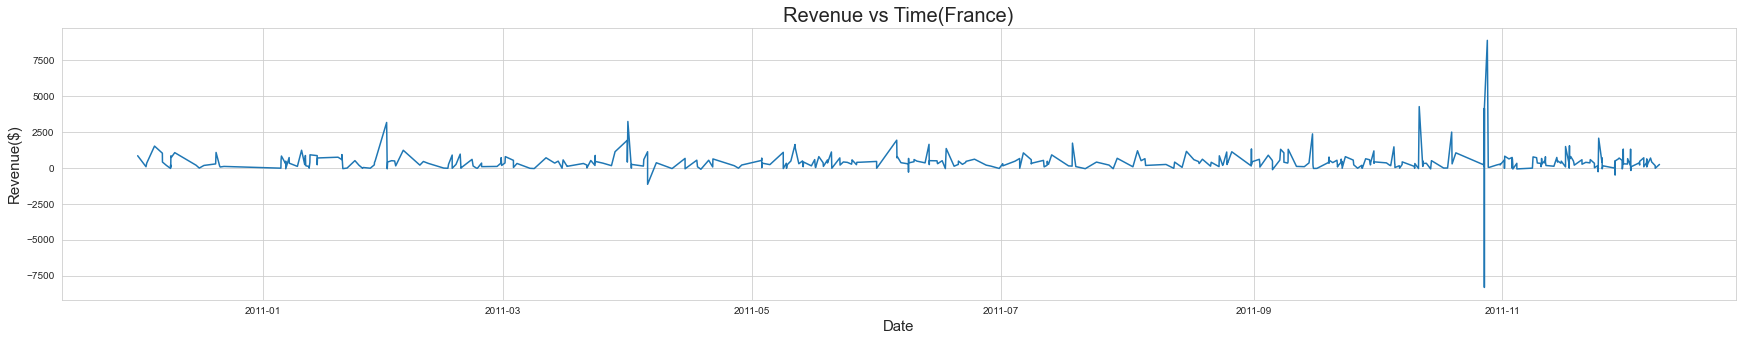

In [107]:
franceTR = france.groupby("InvoiceDate").TotalCost.sum()
plt.rcParams['figure.figsize'] = [30, 5]
fig,ax = plt.subplots()
ax.plot(franceTR.index,franceTR)
plt.title("Revenue vs Time(France)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Australia

In [108]:
australia = data[data["Country"]=="Australia"]
australia.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,201103.332273,6.114467,3.284579,11.426073,66.458665,3.222019,12464.695548,108.909118
std,15.720488,3.035656,1.290724,2.079874,97.724396,12.460438,438.034060,159.070339
min,201012.000000,1.000000,1.000000,8.000000,-120.000000,0.000000,12386.000000,-425.000000
25%,201103.000000,3.000000,2.000000,10.000000,6.000000,1.250000,12415.000000,16.500000
50%,201106.000000,6.000000,3.000000,12.000000,24.000000,1.790000,12415.000000,51.840000
75%,201108.000000,8.000000,4.000000,13.000000,96.000000,3.750000,12415.000000,145.000000
max,201111.000000,12.000000,7.000000,15.000000,1152.000000,350.000000,16321.000000,1718.400000


#### Revenue with time

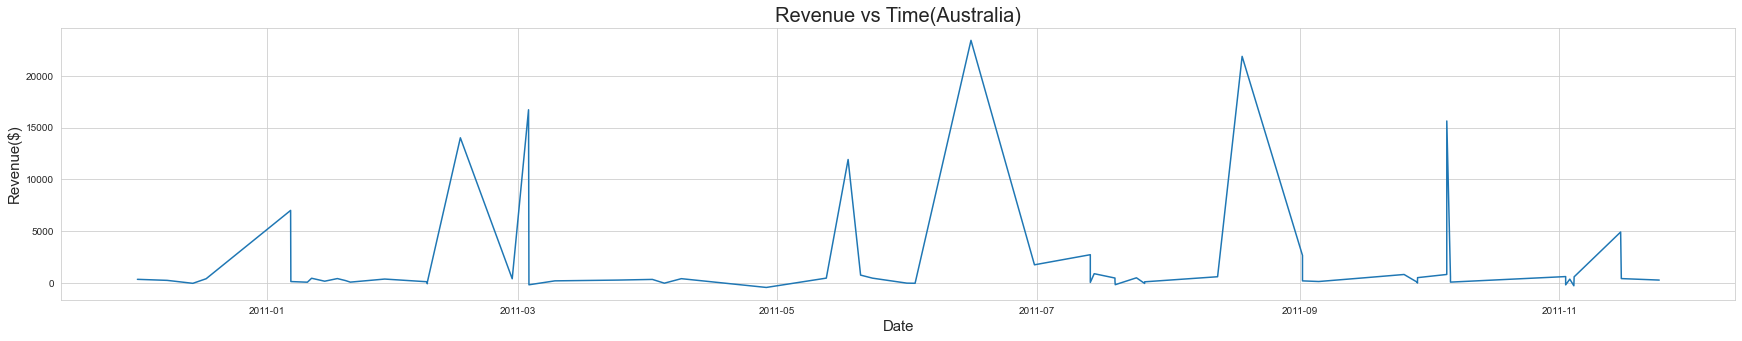

In [109]:
australiaTR = australia.groupby(["InvoiceDate"]).TotalCost.sum()
plt.rcParams['figure.figsize'] = [30, 5]
fig,ax = plt.subplots()
ax.plot(australiaTR.index,australiaTR)
plt.title("Revenue vs Time(Australia)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Netherlands

In [110]:
netherlands = data[data["Country"]=="Netherlands"]
netherlands.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000,2369.000000
mean,201103.700718,6.739975,3.105952,11.724778,84.436893,2.739320,14420.112284,120.101600
std,16.580256,3.475410,1.447331,2.235365,111.402728,6.313981,609.759950,164.333375
min,201012.000000,1.000000,1.000000,6.000000,-480.000000,0.000000,12759.000000,-266.400000
25%,201103.000000,3.000000,2.000000,10.000000,16.000000,0.850000,14646.000000,30.000000
50%,201106.000000,8.000000,3.000000,11.000000,72.000000,1.450000,14646.000000,91.800000
75%,201109.000000,10.000000,4.000000,14.000000,100.000000,2.550000,14646.000000,157.920000
max,201112.000000,12.000000,7.000000,17.000000,2400.000000,206.400000,14646.000000,4992.000000


#### Revenue with time

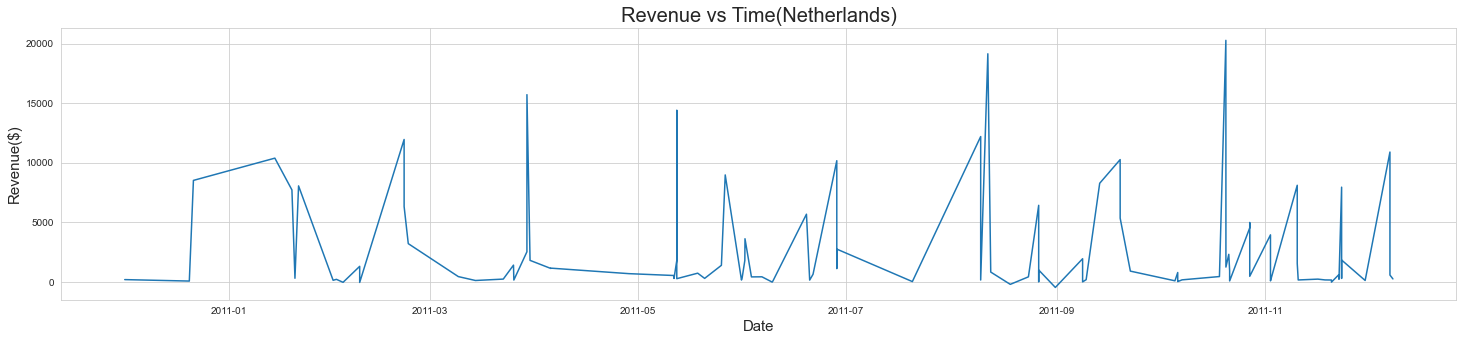

In [111]:
netherlandsTR = netherlands.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(netherlandsTR.index,netherlandsTR)
plt.title("Revenue vs Time(Netherlands)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Germany

In [112]:
germany = data[data["Country"]=="Germany"]
germany.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,9482.000000,9482.000000,9482.000000,9482.000000,9482.000000,9482.000000,9482.000000,9482.000000
mean,201101.338958,7.287070,3.487872,12.111896,12.366800,3.970128,12646.294980,23.348841
std,22.698969,3.438746,1.746487,2.233880,17.875793,16.560142,309.307211,37.347733
min,201012.000000,1.000000,1.000000,8.000000,-288.000000,0.000000,12426.000000,-599.500000
25%,201104.000000,5.000000,2.000000,10.000000,4.000000,1.250000,12480.000000,10.950000
50%,201107.000000,8.000000,4.000000,12.000000,10.000000,1.950000,12592.000000,16.600000
75%,201110.000000,10.000000,5.000000,14.000000,12.000000,3.750000,12662.000000,23.400000
max,201112.000000,12.000000,7.000000,19.000000,600.000000,599.500000,14335.000000,876.000000


#### Revenue with time

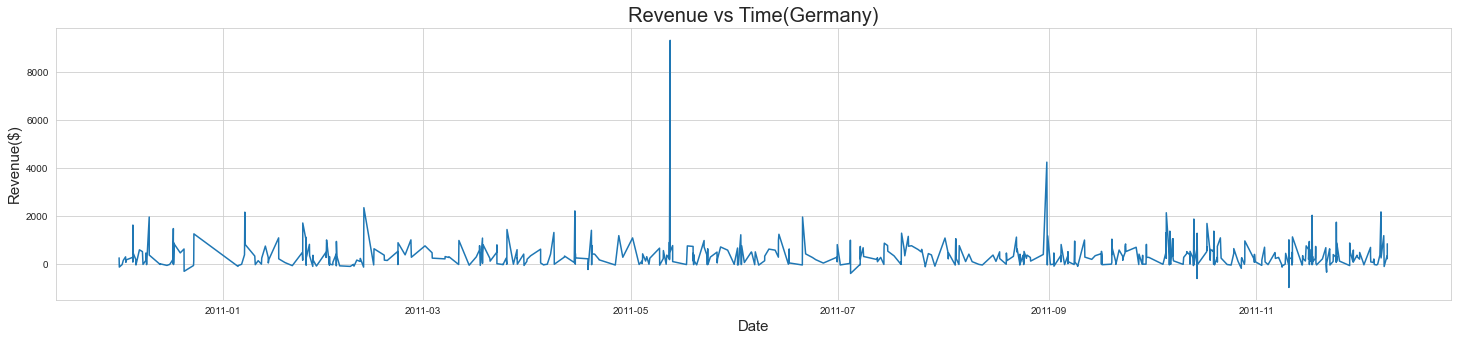

In [113]:
germanyTR = germany.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(germanyTR.index,germanyTR)
plt.title("Revenue vs Time(Germany)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Norway

In [114]:
norway = data[data["Country"]=="Norway"]
norway.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,201095.495853,9.044240,3.490323,12.772350,17.728111,6.016046,12438.036866,32.390470
std,33.150880,2.604969,1.453190,2.104022,22.654651,30.572619,76.680391,46.956114
min,201012.000000,2.000000,1.000000,8.000000,-12.000000,0.000000,12350.000000,-376.500000
25%,201106.000000,7.000000,3.000000,13.000000,6.000000,1.250000,12432.000000,15.000000
50%,201109.000000,9.000000,3.000000,13.000000,12.000000,2.080000,12433.000000,19.800000
75%,201110.000000,11.000000,5.000000,14.000000,24.000000,4.950000,12438.000000,35.400000
max,201112.000000,12.000000,7.000000,17.000000,240.000000,700.000000,12752.000000,700.000000


#### Revenue with time

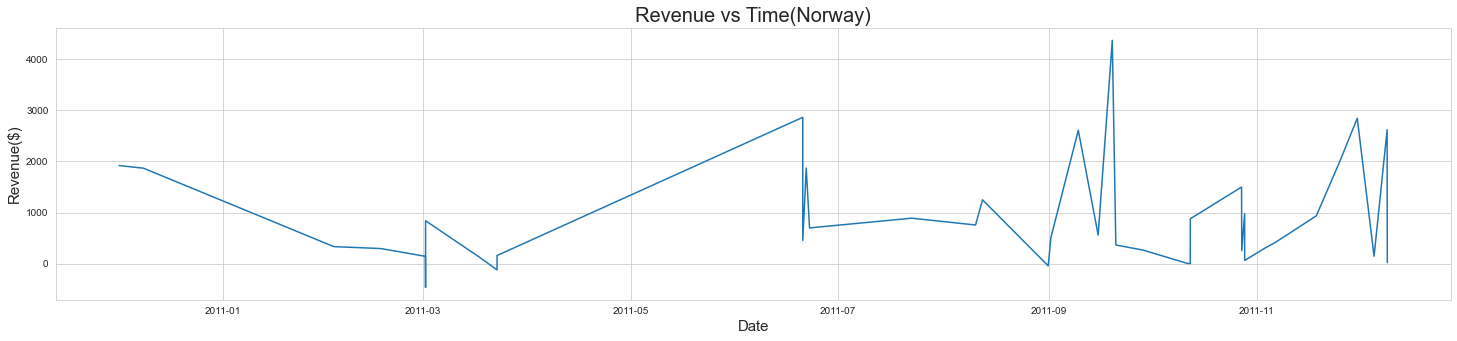

In [115]:
norwayTR = norway.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(norwayTR.index,norwayTR)
plt.title("Revenue vs Time(Norway)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Ireland

In [116]:
ireland = data[data["Country"]=="EIRE"]
ireland.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000
mean,201102.927559,7.752473,3.283881,12.062817,18.216119,5.112113,14748.330928,33.444028
std,20.687304,3.112075,1.700902,2.524535,42.033945,41.824092,314.770005,91.463905
min,201012.000000,1.000000,1.000000,6.000000,-288.000000,0.000000,14016.000000,-1687.170000
25%,201105.000000,5.000000,2.000000,10.000000,4.000000,1.250000,14911.000000,13.200000
50%,201108.000000,9.000000,3.000000,12.000000,10.000000,2.100000,14911.000000,17.340000
75%,201110.000000,10.000000,5.000000,14.000000,12.000000,4.250000,14911.000000,28.080000
max,201112.000000,12.000000,7.000000,19.000000,1440.000000,1687.170000,14911.000000,2365.200000


#### Revenue with time

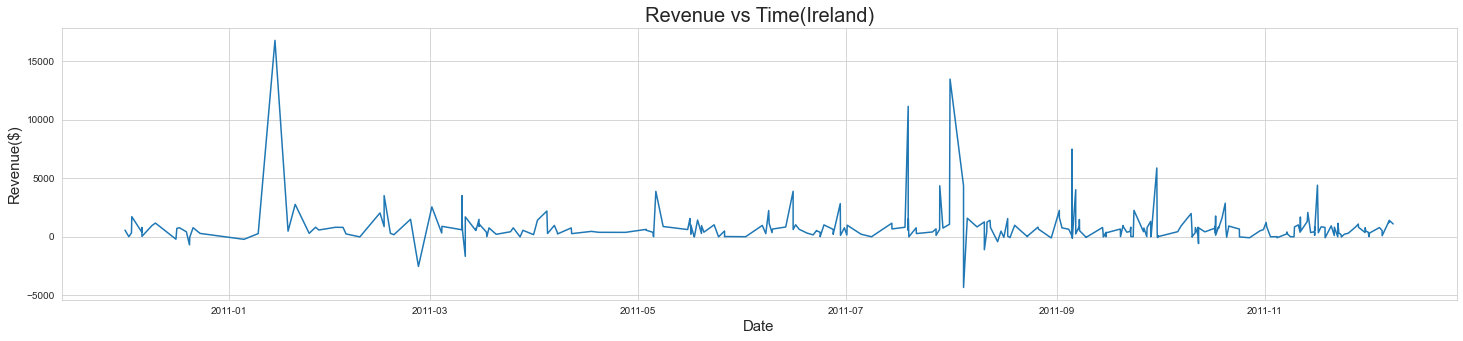

In [117]:
irelandTR = ireland.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(irelandTR.index,irelandTR)
plt.title("Revenue vs Time(Ireland)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Switzerland

In [118]:
switzerland = data[data["Country"]=="Switzerland"]
switzerland.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,201104.585067,7.198400,3.567467,12.012800,15.868800,3.501493,12666.640000,29.706560
std,15.487958,3.216668,1.637054,2.804906,19.303144,5.542169,460.602224,36.518436
min,201012.000000,1.000000,1.000000,8.000000,-120.000000,0.000000,12357.000000,-179.000000
25%,201105.000000,5.000000,2.000000,10.000000,6.000000,1.250000,12378.000000,13.560000
50%,201108.000000,8.000000,3.000000,11.000000,12.000000,1.790000,12451.000000,17.700000
75%,201110.000000,10.000000,5.000000,15.000000,24.000000,3.750000,12458.000000,31.800000
max,201111.000000,12.000000,7.000000,18.000000,288.000000,40.000000,13520.000000,360.000000


#### Revenue with time

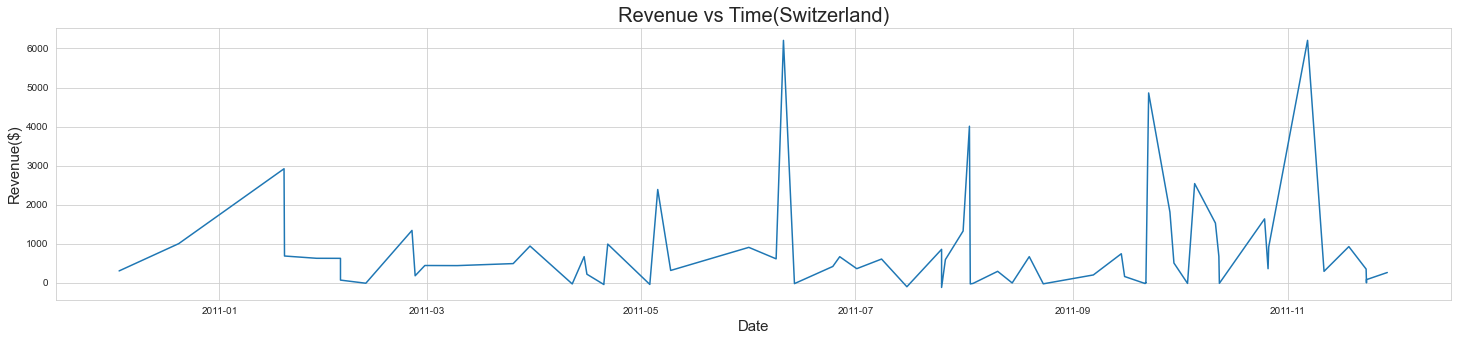

In [119]:
switzerlandTR = switzerland.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(switzerlandTR.index,switzerlandTR)
plt.title("Revenue vs Time(Switzerland)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Spain

In [120]:
spain = data[data["Country"]=="Spain"]
spain.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,201103.794548,6.757803,3.571316,12.855393,10.588700,4.990261,12905.630186,21.626780
std,16.428636,3.649925,1.861815,2.300118,24.139899,41.019251,1271.683635,83.964482
min,201012.000000,1.000000,1.000000,8.000000,-288.000000,0.000000,12354.000000,-1715.850000
25%,201103.000000,3.000000,2.000000,11.000000,3.000000,1.250000,12484.000000,9.900000
50%,201107.000000,8.000000,4.000000,13.000000,6.000000,2.080000,12540.000000,15.000000
75%,201110.000000,10.000000,5.000000,14.000000,12.000000,4.250000,12550.000000,19.800000
max,201112.000000,12.000000,7.000000,18.000000,360.000000,1715.850000,17097.000000,1350.000000


#### Revenue with time

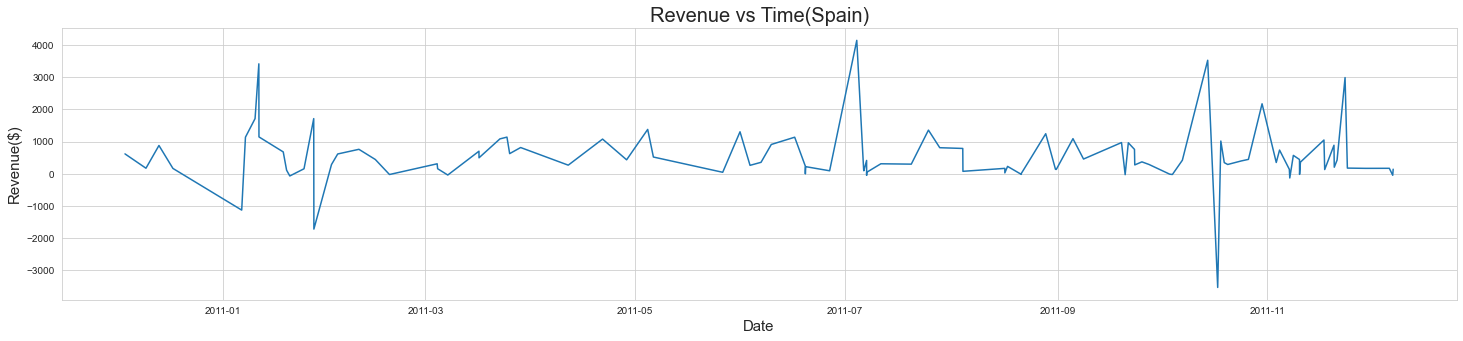

In [121]:
spainTR = spain.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(spainTR.index,spainTR)
plt.title("Revenue vs Time(Spain)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Poland

In [122]:
poland = data[data["Country"]=="Poland"]
poland.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,201104.190616,6.536657,2.944282,11.161290,10.712610,4.170880,12733.055718,21.152903
std,14.667151,3.325831,1.296989,1.733858,10.174628,5.908683,94.922103,16.198307
min,201012.000000,1.000000,1.000000,8.000000,-6.000000,0.190000,12576.000000,-39.800000
25%,201104.000000,4.000000,2.000000,10.000000,4.000000,1.250000,12576.000000,14.850000
50%,201106.000000,6.000000,3.000000,11.000000,10.000000,2.080000,12779.000000,17.400000
75%,201109.000000,9.000000,4.000000,13.000000,12.000000,4.950000,12779.000000,24.900000
max,201111.000000,12.000000,5.000000,17.000000,72.000000,40.000000,12816.000000,120.000000


#### Revenue with time

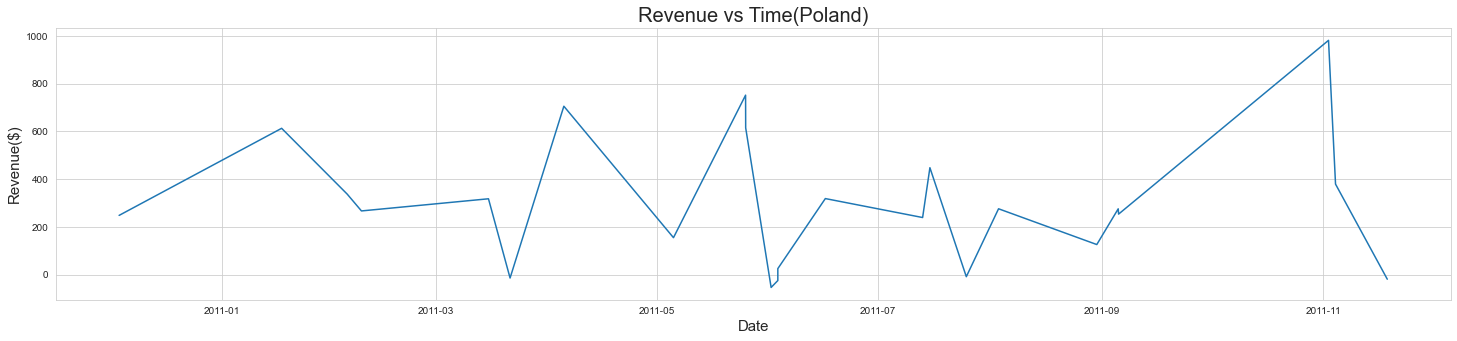

In [123]:
polandTR = poland.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(polandTR.index,polandTR)
plt.title("Revenue vs Time(Poland)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Portugal

In [124]:
portugal = data[data["Country"]=="Portugal"]
portugal.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,201099.681757,7.789865,3.337162,12.451351,10.840541,8.736392,12746.486486,19.635007
std,26.278056,3.644408,1.486190,2.484638,11.914967,72.307978,96.997173,75.427101
min,201012.000000,1.000000,1.000000,8.000000,-12.000000,0.120000,12356.000000,-1241.980000
25%,201103.000000,4.750000,2.000000,11.000000,3.750000,1.250000,12757.000000,9.957500
50%,201108.000000,10.000000,4.000000,12.000000,10.000000,1.650000,12766.000000,15.900000
75%,201110.000000,10.000000,4.000000,14.000000,12.000000,2.950000,12782.250000,20.800000
max,201112.000000,12.000000,7.000000,19.000000,120.000000,1241.980000,12811.000000,1241.980000


#### Revenue with time

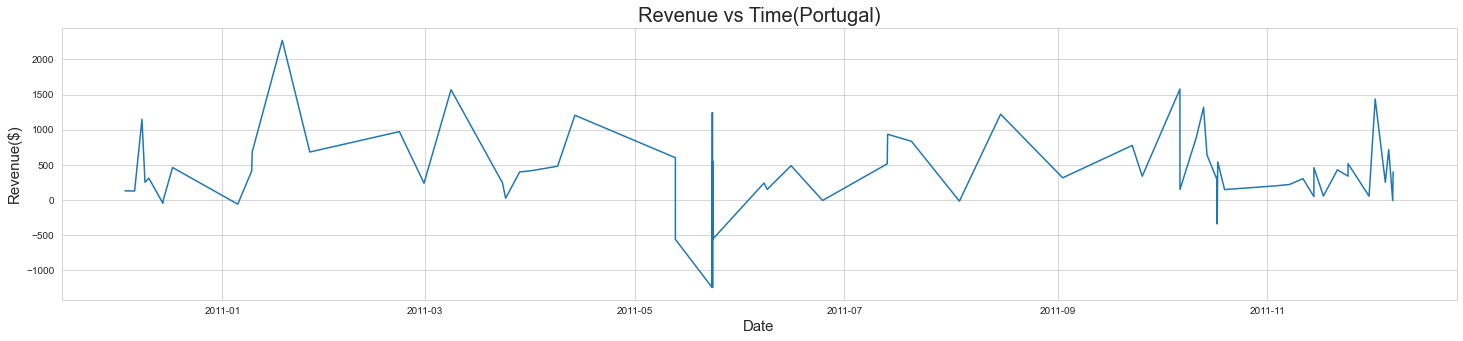

In [125]:
portugalTR = portugal.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(portugalTR.index,portugalTR)
plt.title("Revenue vs Time(Portugal)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Italy

In [126]:
italy = data[data["Country"]=="Italy"]
italy.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,201102.425187,7.537406,3.140898,12.769327,9.958853,4.835087,12648.445137,21.035798
std,21.326486,3.848468,1.516896,2.254784,13.588092,11.819348,437.663291,21.864214
min,201012.000000,1.000000,1.000000,8.000000,-12.000000,0.120000,12349.000000,-89.550000
25%,201103.000000,3.000000,2.000000,12.000000,4.000000,1.530000,12578.000000,14.150000
50%,201108.000000,10.000000,3.000000,13.000000,6.000000,2.550000,12584.000000,17.400000
75%,201110.000000,11.000000,4.000000,15.000000,12.000000,4.950000,12610.000000,23.400000
max,201112.000000,12.000000,7.000000,18.000000,200.000000,300.000000,14912.000000,300.000000


#### Revenue with time

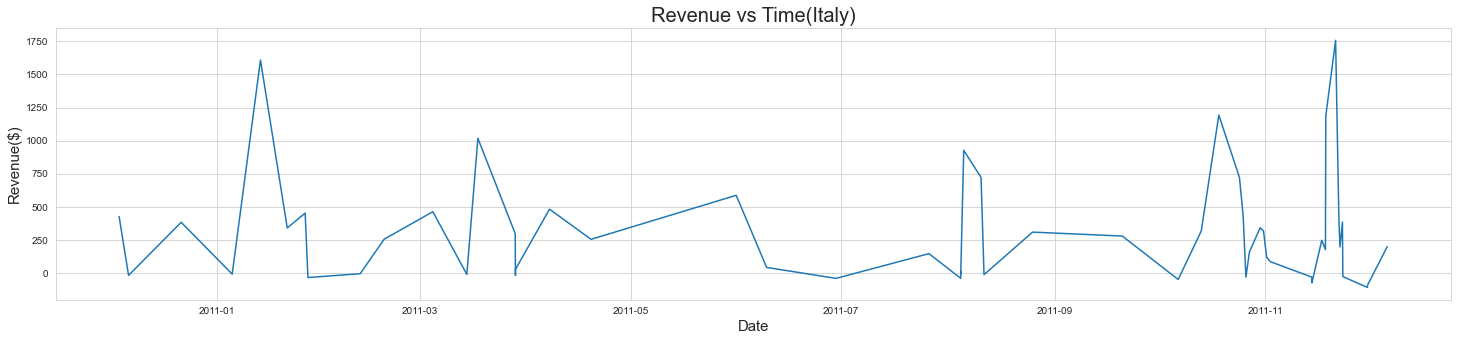

In [127]:
italyTR = italy.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(italyTR.index,italyTR)
plt.title("Revenue vs Time(Italy)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Belgium

In [128]:
belgium = data[data["Country"]=="Belgium"]
belgium.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,201102.795553,7.387144,3.667472,12.241179,11.189947,3.644335,12430.298695,19.773301
std,20.158757,3.235509,1.579184,2.494738,13.601441,4.244522,109.959803,15.583858
min,201012.000000,1.000000,1.000000,8.000000,-12.000000,0.120000,12361.000000,-19.950000
25%,201104.000000,5.000000,2.000000,10.000000,4.000000,1.250000,12383.000000,12.750000
50%,201107.000000,8.000000,4.000000,13.000000,10.000000,1.950000,12407.000000,16.600000
75%,201110.000000,10.000000,5.000000,14.000000,12.000000,4.150000,12431.000000,20.400000
max,201112.000000,12.000000,7.000000,18.000000,272.000000,39.950000,12876.000000,165.000000


#### Revenue with time

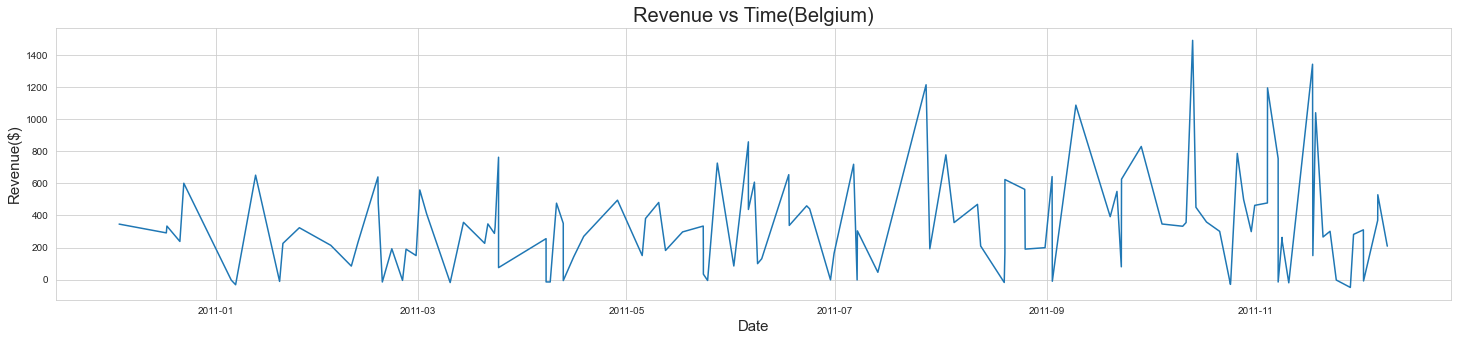

In [129]:
belgiumTR = belgium.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(belgiumTR.index,belgiumTR)
plt.title("Revenue vs Time(Belgium)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Lithuania

In [130]:
lithuania = data[data["Country"]=="Lithuania"]
lithuania.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,35.0,35.0,35.000000,35.000000,35.000000,35.000000,35.0,35.000000
mean,201012.0,12.0,6.885714,12.057143,18.628571,2.841143,15332.0,47.458857
std,0.0,0.0,0.676123,0.338062,10.137542,1.366849,0.0,23.824265
min,201012.0,12.0,3.000000,12.000000,6.000000,1.250000,15332.0,13.200000
25%,201012.0,12.0,7.000000,12.000000,12.000000,1.650000,15332.0,28.200000
50%,201012.0,12.0,7.000000,12.000000,16.000000,2.550000,15332.0,45.000000
75%,201012.0,12.0,7.000000,12.000000,24.000000,3.750000,15332.0,60.000000
max,201012.0,12.0,7.000000,14.000000,48.000000,5.950000,15332.0,122.400000


#### Revenue with time

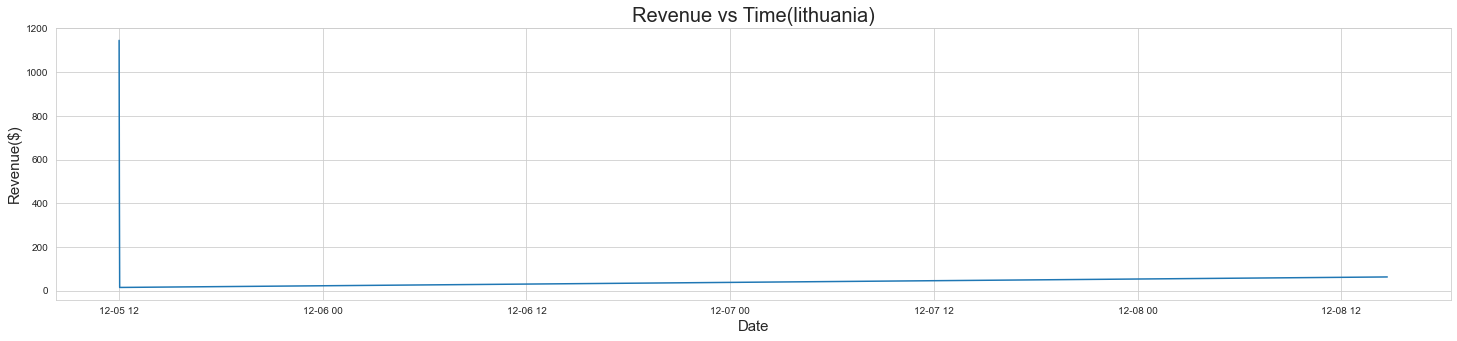

In [131]:
lithuaniaTR = lithuania.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(lithuaniaTR.index,lithuaniaTR)
plt.title("Revenue vs Time(lithuania)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Japan

In [132]:
japan = data[data["Country"]=="Japan"]
japan.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,201088.149296,6.459155,3.808451,10.994366,70.228169,2.283127,12757.839437,98.378789
std,36.224234,3.963876,1.873827,1.892588,177.777113,3.103647,13.601870,312.545944
min,201012.000000,1.000000,1.000000,9.000000,-624.000000,0.210000,12753.000000,-1591.200000
25%,201102.000000,2.500000,3.000000,10.000000,4.000000,0.850000,12753.000000,5.040000
50%,201103.000000,5.000000,3.000000,11.000000,36.000000,1.650000,12753.000000,61.200000
75%,201107.000000,11.000000,5.000000,11.000000,72.000000,2.550000,12754.000000,120.000000
max,201112.000000,12.000000,7.000000,18.000000,2040.000000,45.570000,12812.000000,3794.400000


#### Revenue with time

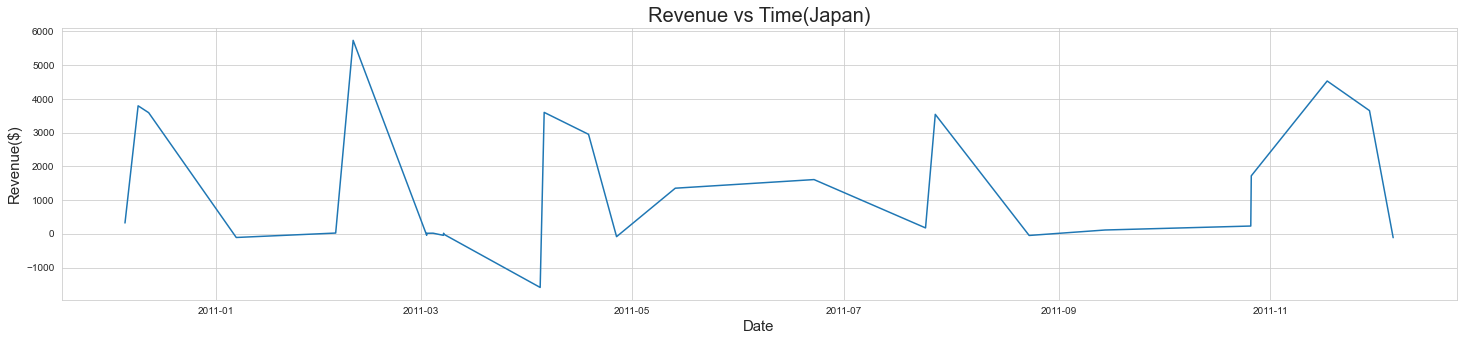

In [133]:
japanTR = japan.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(japanTR.index,japanTR)
plt.title("Revenue vs Time(Japan)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Iceland

In [134]:
iceland = data[data["Country"]=="Iceland"]
iceland.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0,181.000000
mean,201090.458564,7.585635,2.430939,12.193370,13.513812,2.649503,12347.0,23.702762
std,35.919581,3.874362,1.106513,2.105854,18.908143,2.260417,0.0,23.352705
min,201012.000000,1.000000,1.000000,8.000000,2.000000,0.250000,12347.0,5.040000
25%,201101.000000,4.000000,1.000000,10.000000,6.000000,1.250000,12347.0,13.200000
50%,201106.000000,8.000000,2.000000,12.000000,12.000000,2.080000,12347.0,17.000000
75%,201110.000000,10.000000,3.000000,14.000000,12.000000,3.750000,12347.0,25.200000
max,201112.000000,12.000000,4.000000,15.000000,240.000000,12.750000,12347.0,249.600000


### Revenue with time

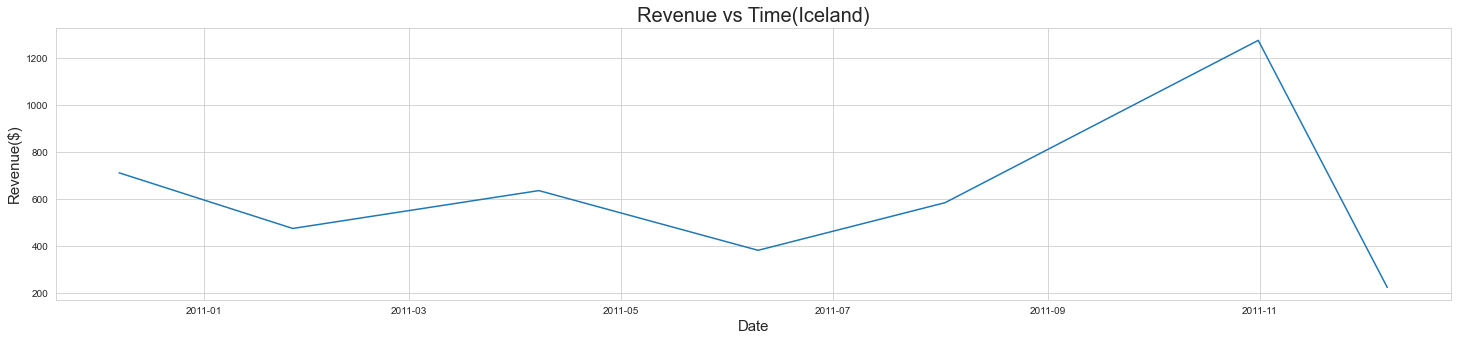

In [135]:
icelandTR = iceland.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(icelandTR.index,icelandTR)
plt.title("Revenue vs Time(Iceland)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Channel Islands

In [136]:
ci = data[data["Country"]=="Channel Islands"]
ci.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,201104.548813,6.791557,3.427441,11.027704,12.505277,4.932124,14888.151715,26.499063
std,14.363083,3.187050,1.619526,1.818160,22.570877,15.547404,142.690534,39.784329
min,201012.000000,1.000000,1.000000,6.000000,-2.000000,0.190000,14442.000000,-293.000000
25%,201103.000000,3.000000,2.000000,10.000000,4.000000,1.450000,14930.000000,15.000000
50%,201108.000000,8.000000,3.000000,11.000000,10.000000,2.550000,14936.000000,17.700000
75%,201109.000000,10.000000,4.000000,12.000000,12.000000,6.250000,14936.000000,25.200000
max,201112.000000,12.000000,7.000000,17.000000,407.000000,293.000000,14937.000000,408.000000


#### Revenue with time

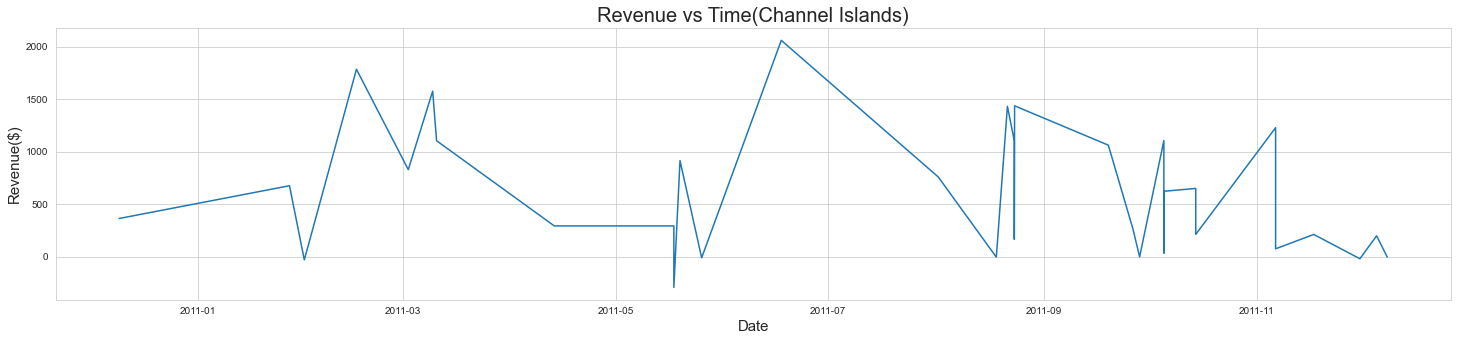

In [137]:
ciTR = ci.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(ciTR.index,ciTR)
plt.title("Revenue vs Time(Channel Islands)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Denmark

In [138]:
denmark = data[data["Country"]=="Denmark"]
denmark.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,201102.796915,7.938303,3.097686,12.593830,21.048843,3.256941,12536.591260,48.247147
std,21.339243,2.876549,1.197385,3.505454,27.402502,3.960285,421.885123,72.244489
min,201012.000000,2.000000,1.000000,7.000000,-25.000000,0.210000,12367.000000,-59.800000
25%,201106.000000,6.000000,3.000000,10.000000,12.000000,1.250000,12406.000000,13.920000
50%,201107.000000,8.000000,4.000000,12.000000,12.000000,1.950000,12412.000000,23.400000
75%,201110.000000,11.000000,4.000000,15.000000,24.000000,3.750000,12429.000000,45.900000
max,201112.000000,12.000000,5.000000,19.000000,256.000000,18.000000,13919.000000,428.400000


#### Revenue with time

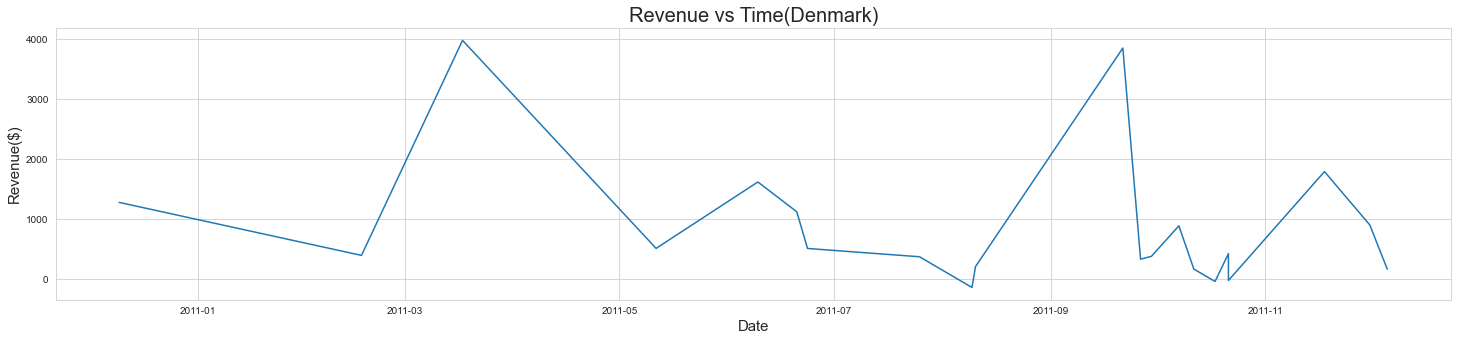

In [139]:
denmarkTR = denmark.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(denmarkTR.index,denmarkTR)
plt.title("Revenue vs Time(Denmark)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Cyprus

In [140]:
cyprus = data[data["Country"]=="Cyprus"]
cyprus.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,622.000000,622.000000,622.00000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,201093.982315,7.326367,3.31672,12.025723,10.155949,6.302363,12404.951768,20.813971
std,32.407053,4.116411,1.48020,1.473102,23.263590,22.419586,198.881197,34.078667
min,201012.000000,1.000000,1.00000,8.000000,-33.000000,0.120000,12359.000000,-320.690000
25%,201102.000000,2.000000,2.00000,12.000000,2.000000,1.250000,12359.000000,9.950000
50%,201106.000000,10.000000,4.00000,12.000000,5.000000,2.950000,12370.000000,16.200000
75%,201110.000000,11.000000,5.00000,12.000000,12.000000,4.950000,12391.000000,22.500000
max,201112.000000,12.000000,5.00000,17.000000,288.000000,320.690000,13809.000000,320.690000


#### Revenue with time

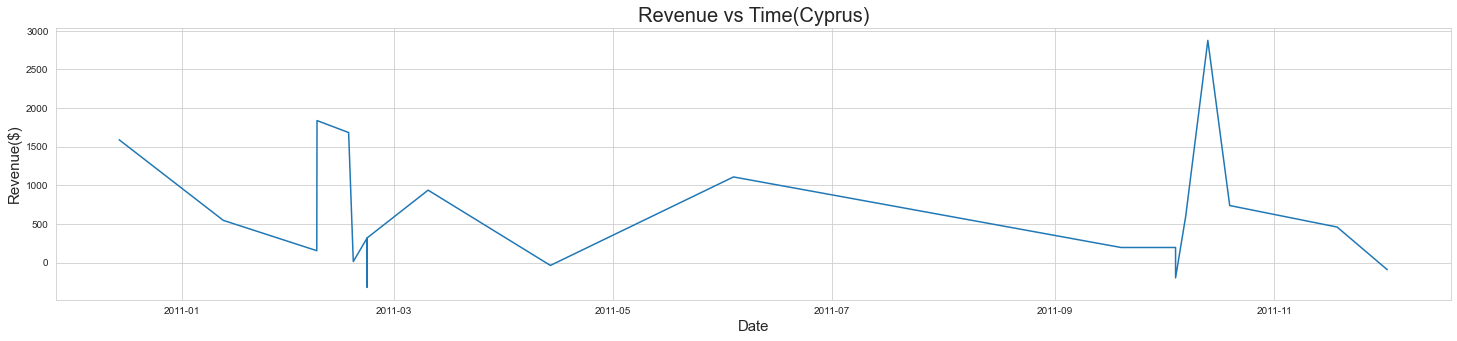

In [141]:
cyprusTR = cyprus.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(cyprusTR.index,cyprusTR)
plt.title("Revenue vs Time(Cyprus)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Sweden

In [142]:
sweden = data[data["Country"]=="Sweden"]
sweden.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,201101.437229,7.281385,3.904762,12.322511,77.136364,3.910887,14697.149351,79.211926
std,22.524303,3.340873,2.041760,2.184021,128.891540,8.285089,2378.969176,132.473269
min,201012.000000,1.000000,1.000000,8.000000,-240.000000,0.190000,12483.000000,-1188.000000
25%,201104.000000,4.000000,2.000000,10.000000,8.000000,0.830000,12638.000000,15.000000
50%,201107.000000,8.000000,4.000000,12.000000,20.000000,1.650000,12697.000000,30.000000
75%,201110.000000,10.000000,5.000000,14.000000,96.000000,2.950000,17404.000000,114.450000
max,201112.000000,12.000000,7.000000,18.000000,768.000000,40.000000,17404.000000,1188.000000


#### Revenue with time

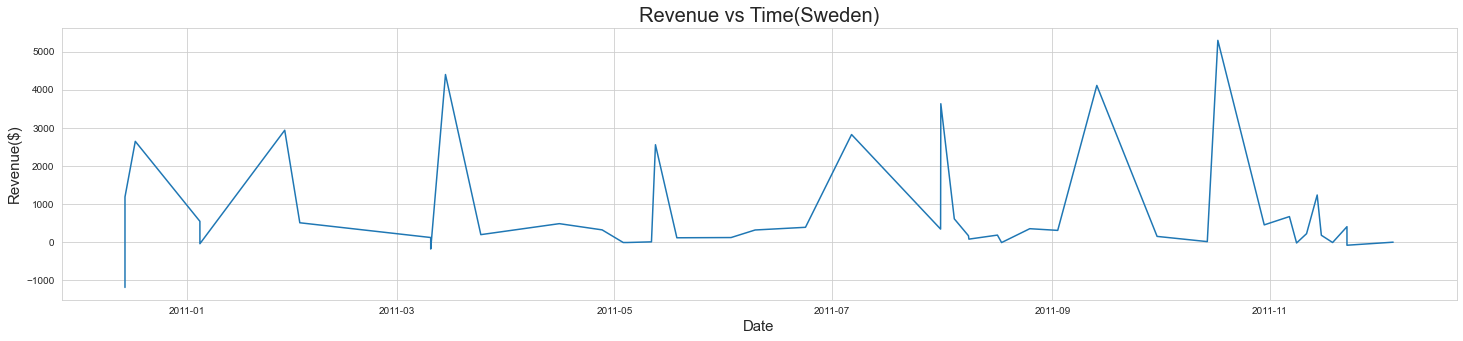

In [143]:
swedenTR = sweden.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(swedenTR.index,swedenTR)
plt.title("Revenue vs Time(Sweden)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Austria

In [144]:
austria = data[data["Country"]=="Australia"]
austria.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,201103.332273,6.114467,3.284579,11.426073,66.458665,3.222019,12464.695548,108.909118
std,15.720488,3.035656,1.290724,2.079874,97.724396,12.460438,438.034060,159.070339
min,201012.000000,1.000000,1.000000,8.000000,-120.000000,0.000000,12386.000000,-425.000000
25%,201103.000000,3.000000,2.000000,10.000000,6.000000,1.250000,12415.000000,16.500000
50%,201106.000000,6.000000,3.000000,12.000000,24.000000,1.790000,12415.000000,51.840000
75%,201108.000000,8.000000,4.000000,13.000000,96.000000,3.750000,12415.000000,145.000000
max,201111.000000,12.000000,7.000000,15.000000,1152.000000,350.000000,16321.000000,1718.400000


#### Revenue with time

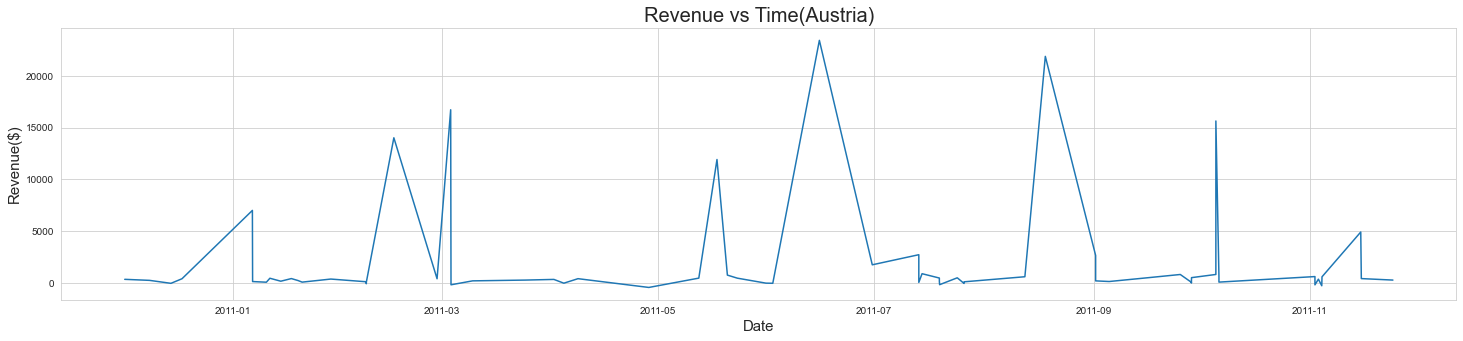

In [145]:
austriaTR = austria.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(austriaTR.index,austriaTR)
plt.title("Revenue vs Time(Austria)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Israel

In [146]:
israel = data[data["Country"]=="Israel"]
israel.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000
mean,201107.012000,7.812000,3.656000,9.208000,15.960000,3.650000,12657.868000,27.97700
std,8.718481,1.749543,0.706868,2.104865,16.730512,9.334524,59.443289,38.21825
min,201012.000000,2.000000,2.000000,8.000000,-32.000000,0.060000,12512.000000,-136.00000
25%,201108.000000,8.000000,4.000000,8.000000,4.000000,0.850000,12653.000000,10.20000
50%,201108.000000,8.000000,4.000000,8.000000,12.000000,1.650000,12688.000000,18.92000
75%,201108.000000,8.000000,4.000000,10.000000,24.000000,3.750000,12688.000000,31.50000
max,201110.000000,12.000000,4.000000,14.000000,100.000000,125.000000,12688.000000,350.40000


#### Revenue with time

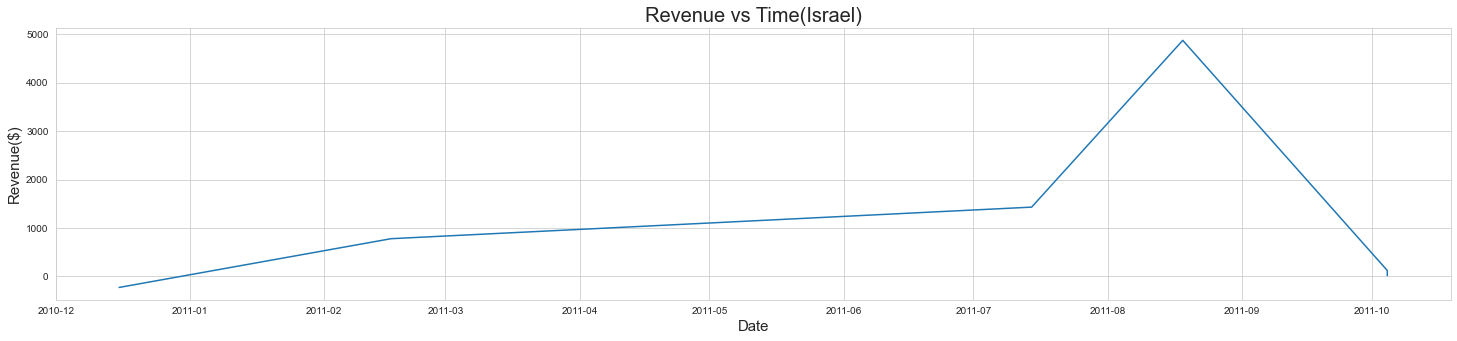

In [147]:
israelTR = israel.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(israelTR.index,israelTR)
plt.title("Revenue vs Time(Israel)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Finland

In [148]:
finland = data[data["Country"]=="Finland"]
finland.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.00000,695.000000
mean,201104.266187,6.712230,3.125180,11.007194,15.346763,5.448705,12517.01295,32.124806
std,14.972489,3.334054,1.289567,2.959127,21.001421,13.596057,122.39165,49.169237
min,201012.000000,1.000000,1.000000,8.000000,-27.000000,0.120000,12348.00000,-80.000000
25%,201103.000000,3.000000,2.000000,9.000000,6.000000,0.850000,12428.00000,13.500000
50%,201107.000000,7.000000,3.000000,10.000000,10.000000,2.080000,12428.00000,17.850000
75%,201110.000000,10.000000,4.000000,12.000000,12.000000,4.450000,12631.00000,31.600000
max,201112.000000,12.000000,7.000000,19.000000,144.000000,275.600000,12704.00000,551.200000


#### Revenue with time

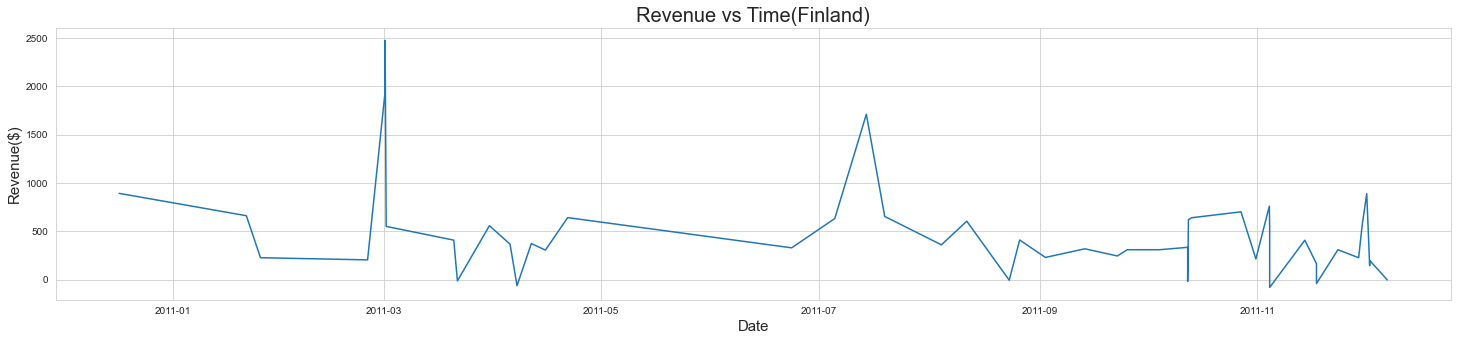

In [149]:
finlandTR = finland.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(finlandTR.index,finlandTR)
plt.title("Revenue vs Time(Finland)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Greece

In [150]:
greece = data[data["Country"]=="Greece"]
greece.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,201105.678082,5.678082,2.698630,10.356164,10.657534,4.885548,13757.424658,32.263836
std,4.091935,4.091935,1.786423,1.925293,7.724067,8.470147,1749.647925,36.389952
min,201101.000000,1.000000,1.000000,8.000000,-1.000000,0.140000,12478.000000,-50.000000
25%,201103.000000,3.000000,1.000000,9.000000,5.250000,1.250000,12717.000000,12.625000
50%,201104.000000,4.000000,2.000000,10.000000,10.000000,2.100000,12717.000000,16.600000
75%,201107.000000,7.000000,5.000000,11.000000,12.000000,5.550000,14439.000000,30.000000
max,201112.000000,12.000000,5.000000,14.000000,48.000000,50.000000,17508.000000,175.200000


#### Revenue with time

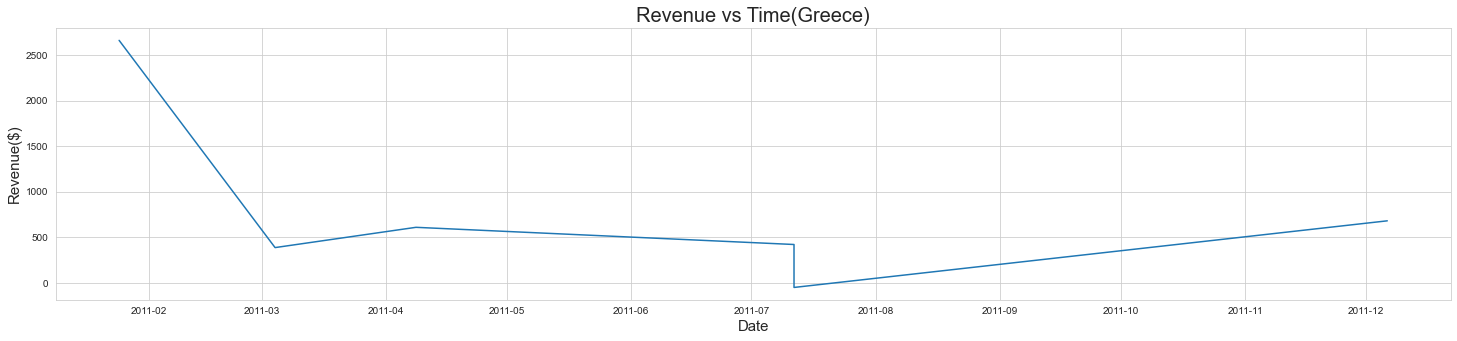

In [151]:
greeceTR = greece.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(greeceTR.index,greeceTR)
plt.title("Revenue vs Time(Greece)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Singapore

In [152]:
singapore = data[data["Country"]=="Singapore"]
singapore.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.000000
mean,201105.192140,5.192140,2.065502,11.768559,22.855895,109.645808,12744.0,39.827031
std,3.070478,3.070478,1.284212,1.433823,27.742886,515.275500,0.0,527.909692
min,201101.000000,1.000000,1.000000,10.000000,-1.000000,0.190000,12744.0,-3949.320000
25%,201104.000000,4.000000,1.000000,11.000000,8.000000,1.250000,12744.0,16.800000
50%,201104.000000,4.000000,2.000000,11.000000,12.000000,2.100000,12744.0,34.800000
75%,201107.000000,7.000000,2.000000,13.000000,24.000000,4.150000,12744.0,60.000000
max,201110.000000,10.000000,5.000000,14.000000,288.000000,3949.320000,12744.0,3949.320000


#### Revenue with time

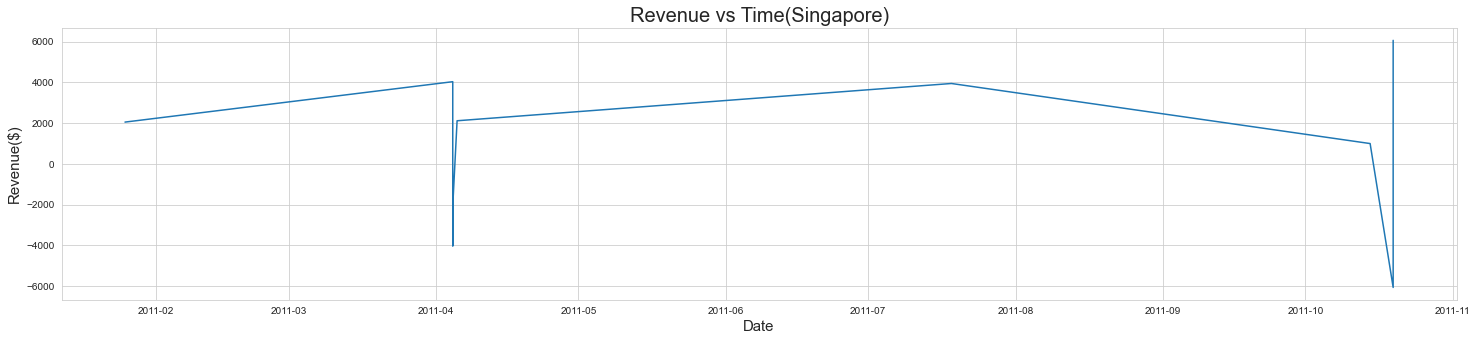

In [153]:
singaporeTR = singapore.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(singaporeTR.index,singaporeTR)
plt.title("Revenue vs Time(Singapore)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Lebanon

In [154]:
lebanon = data[data["Country"]=="Lebanon"]
lebanon.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,45.0,45.0,45.0,45.0,45.000000,45.000000,45.0,45.000000
mean,201101.0,1.0,4.0,10.0,8.577778,5.387556,12764.0,37.641778
std,0.0,0.0,0.0,0.0,4.314294,4.068741,0.0,29.117840
min,201101.0,1.0,4.0,10.0,2.000000,0.550000,12764.0,10.200000
25%,201101.0,1.0,4.0,10.0,6.000000,2.550000,12764.0,17.000000
50%,201101.0,1.0,4.0,10.0,8.000000,3.950000,12764.0,31.600000
75%,201101.0,1.0,4.0,10.0,12.000000,7.950000,12764.0,47.400000
max,201101.0,1.0,4.0,10.0,24.000000,14.950000,12764.0,153.000000


#### Revenue with time

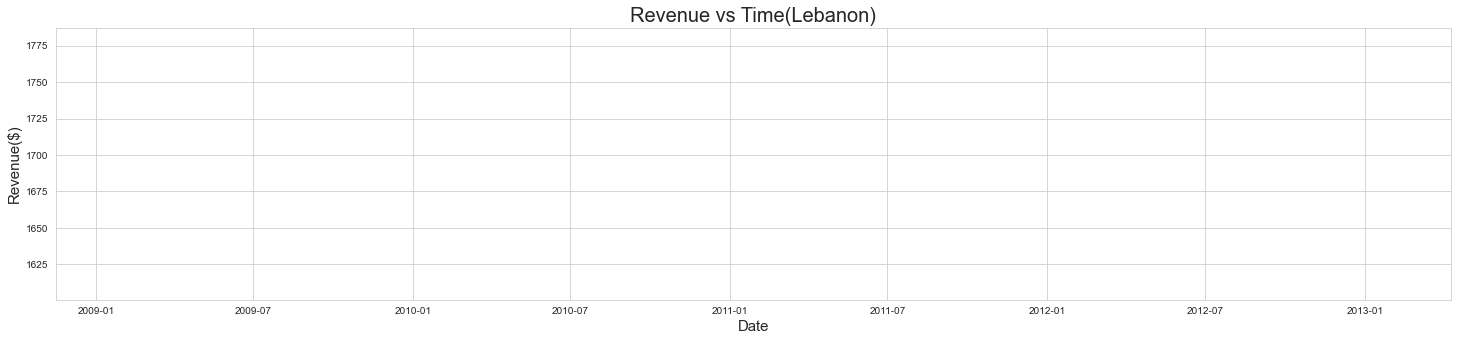

In [155]:
lebanonTR = lebanon.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(lebanonTR.index,lebanonTR)
plt.title("Revenue vs Time(Lebanon)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### United Arab Emirates

In [156]:
uae = data[data["Country"]=="United Arab Emirates"]
uae.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,201105.911765,5.911765,2.676471,14.735294,14.441176,3.380735,14984.588235,27.974706
std,3.501536,3.501536,1.500658,2.495474,12.474909,5.342353,2546.116963,24.413711
min,201102.000000,2.000000,1.000000,12.000000,1.000000,0.290000,12739.000000,3.480000
25%,201102.000000,2.000000,1.000000,12.000000,6.000000,1.150000,12739.000000,15.225000
50%,201109.000000,9.000000,4.000000,17.000000,12.000000,1.670000,12739.000000,20.400000
75%,201109.000000,9.000000,4.000000,17.000000,12.000000,3.250000,17829.000000,29.775000
max,201109.000000,9.000000,4.000000,17.000000,72.000000,37.500000,17829.000000,153.000000


#### Revenue with time

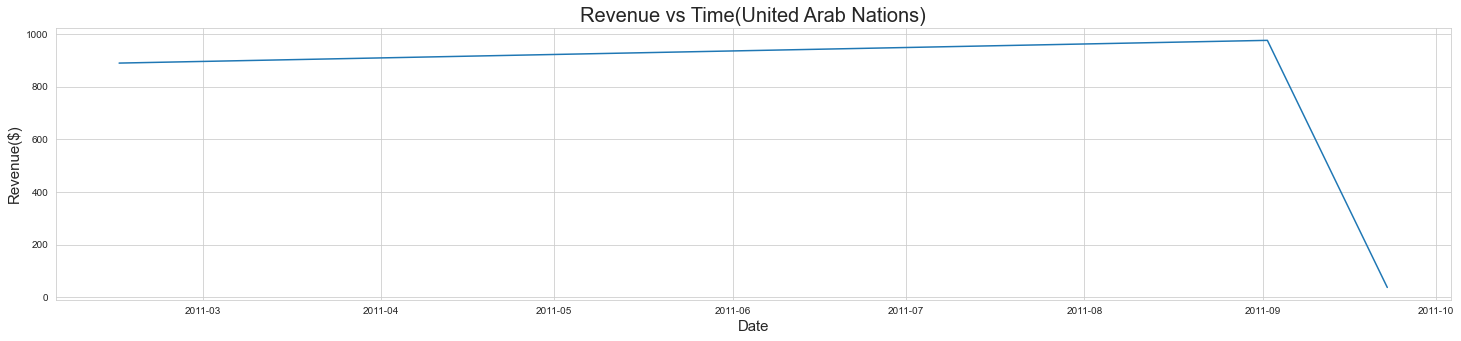

In [157]:
uaeTR = uae.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(uaeTR.index,uaeTR)
plt.title("Revenue vs Time(United Arab Nations)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Saudi Arabia

In [158]:
sa = data[data["Country"]=="Saudi Arabia"]
sa.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.0,10.000000
mean,201102.100000,2.100000,4.0,10.100000,7.500000,2.411000,12565.0,13.117000
std,0.316228,0.316228,0.0,0.316228,5.720334,1.385131,0.0,10.861336
min,201102.000000,2.000000,4.0,10.000000,-5.000000,0.420000,12565.0,-14.750000
25%,201102.000000,2.000000,4.0,10.000000,6.000000,1.650000,12565.0,12.585000
50%,201102.000000,2.000000,4.0,10.000000,9.000000,2.300000,12565.0,17.700000
75%,201102.000000,2.000000,4.0,10.000000,12.000000,2.950000,12565.0,19.275000
max,201103.000000,3.000000,4.0,11.000000,12.000000,5.490000,12565.0,19.800000


#### Revenue with time

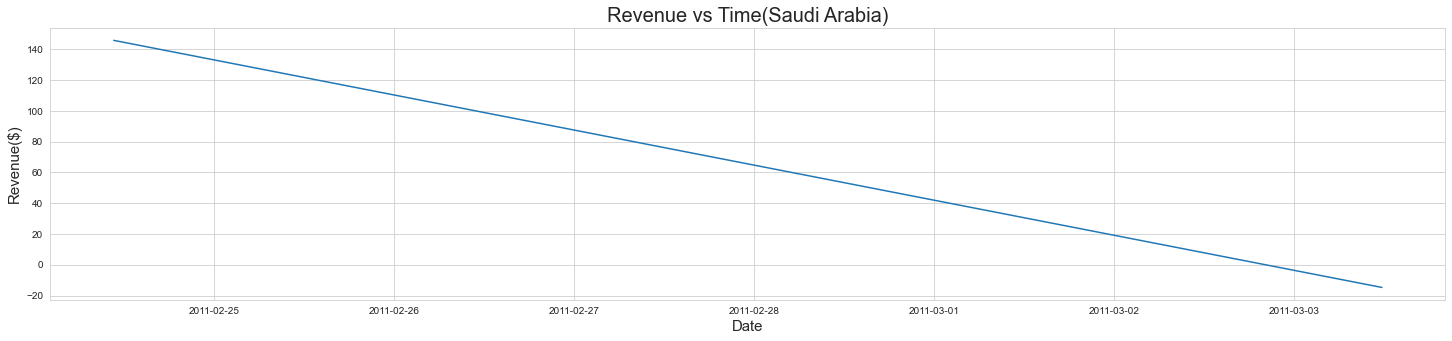

In [159]:
saTR = sa.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(saTR.index,saTR)
plt.title("Revenue vs Time(Saudi Arabia)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Czech Republic

In [160]:
cr = data[data["Country"]=="Czech Republic"]
cr.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,201105.700000,5.700000,3.000000,9.433333,19.733333,2.938333,12781.0,23.590667
std,4.069652,4.069652,2.034191,2.095699,22.813990,7.098840,0.0,26.302604
min,201102.000000,2.000000,1.000000,8.000000,-24.000000,0.290000,12781.0,-35.760000
25%,201102.000000,2.000000,1.000000,8.000000,12.000000,0.835000,12781.0,15.600000
50%,201103.000000,3.000000,3.000000,8.500000,24.000000,1.450000,12781.0,25.300000
75%,201110.000000,10.000000,5.000000,10.000000,24.000000,2.400000,12781.0,39.780000
max,201111.000000,11.000000,5.000000,15.000000,72.000000,40.000000,12781.0,70.800000


#### Revenue with time

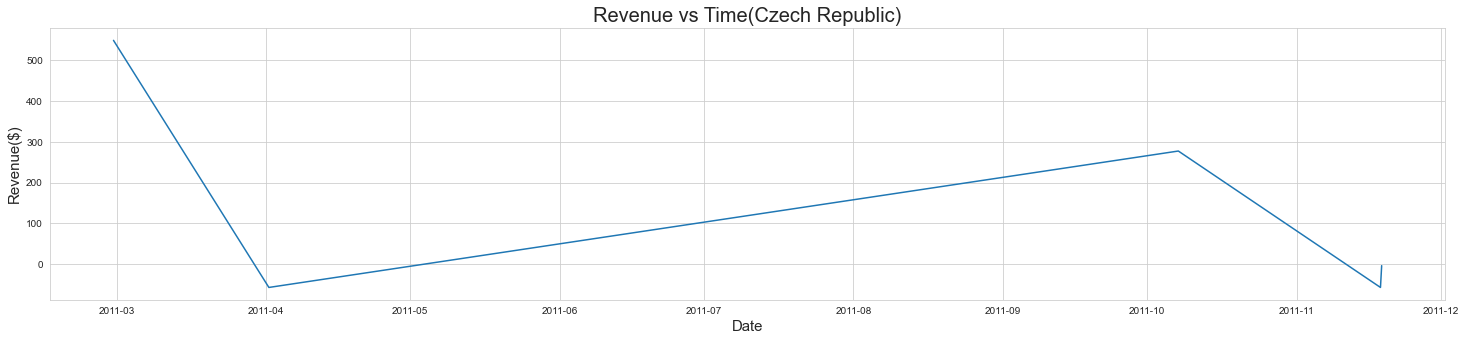

In [161]:
crTR = cr.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(crTR.index,crTR)
plt.title("Revenue vs Time(Czech Republic)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Canada

In [162]:
canada = data[data["Country"]=="Canada"]
canada.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,201106.377483,6.377483,1.139073,9.867550,18.298013,6.030331,17321.079470,24.280662
std,1.056672,1.056672,0.643322,1.011108,46.682587,44.713675,521.471208,61.117249
min,201103.000000,3.000000,1.000000,9.000000,1.000000,0.100000,15388.000000,2.500000
25%,201106.000000,6.000000,1.000000,9.000000,6.000000,0.830000,17444.000000,10.500000
50%,201107.000000,7.000000,1.000000,10.000000,12.000000,1.650000,17444.000000,16.500000
75%,201107.000000,7.000000,1.000000,10.000000,20.000000,2.950000,17444.000000,19.800000
max,201108.000000,8.000000,5.000000,13.000000,504.000000,550.940000,17844.000000,550.940000


#### Revenue with time

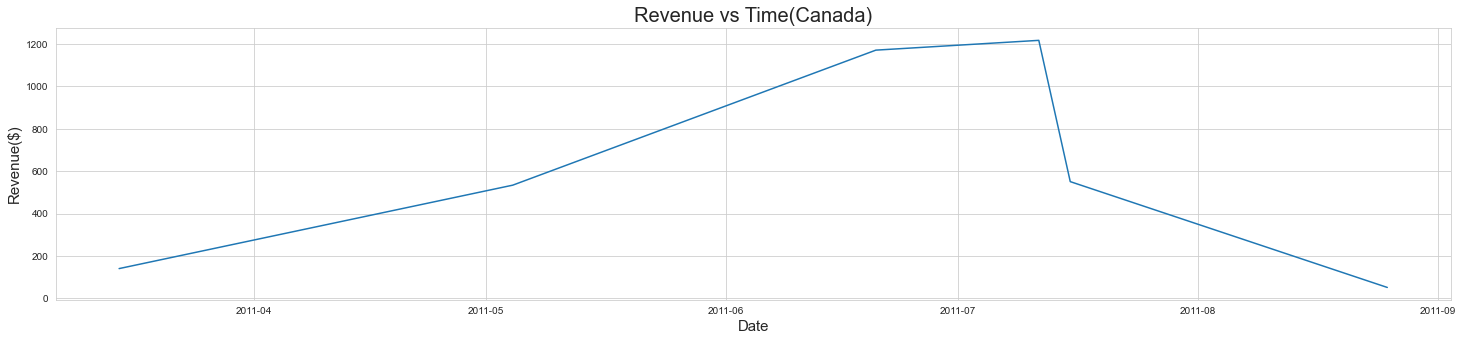

In [163]:
canadaTR = canada.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(canadaTR.index,canadaTR)
plt.title("Revenue vs Time(Canada)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Brazil

In [164]:
brazil = data[data["Country"]=="Brazil"]
brazil.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,32.0,32.0,32.0,32.0,32.000000,32.000000,32.0,32.000000
mean,201104.0,4.0,5.0,10.0,11.125000,4.456250,12769.0,35.737500
std,0.0,0.0,0.0,0.0,8.476723,2.831727,0.0,32.896282
min,201104.0,4.0,5.0,10.0,2.000000,0.850000,12769.0,15.000000
25%,201104.0,4.0,5.0,10.0,3.000000,2.047500,12769.0,16.500000
50%,201104.0,4.0,5.0,10.0,10.000000,3.320000,12769.0,19.650000
75%,201104.0,4.0,5.0,10.0,18.000000,6.750000,12769.0,47.475000
max,201104.0,4.0,5.0,10.0,24.000000,10.950000,12769.0,175.200000


#### Revenue with time

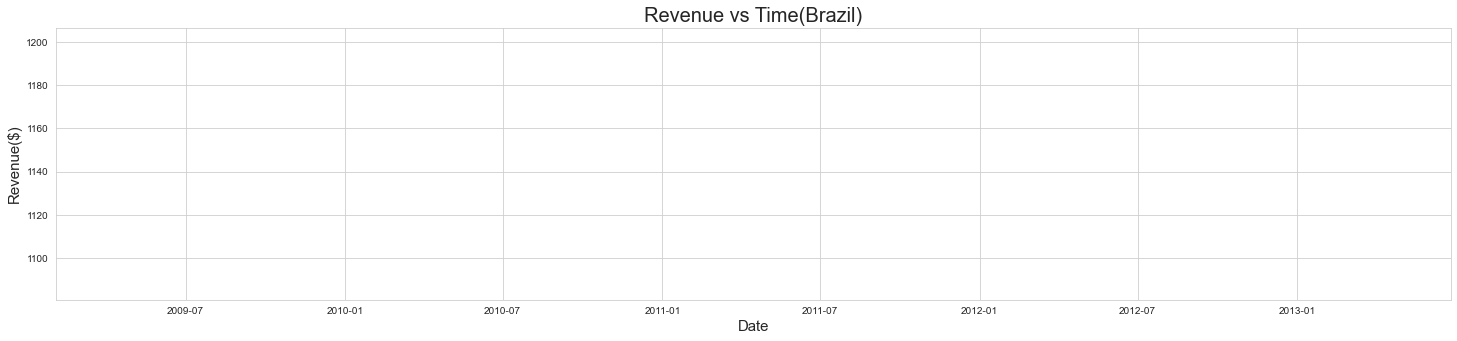

In [165]:
brazilTR = brazil.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(brazilTR.index,brazilTR)
plt.title("Revenue vs Time(Brazil)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### USA

In [166]:
usa = data[data["Country"]=="USA"]
usa.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,201109.841924,9.841924,2.364261,14.783505,3.553265,2.216426,12618.852234,5.948179
std,1.816333,1.816333,1.368851,2.275326,16.450545,2.261647,38.491407,21.614088
min,201104.000000,4.000000,1.000000,10.000000,-36.000000,0.420000,12558.000000,-74.880000
25%,201110.000000,10.000000,1.000000,16.000000,-10.000000,0.850000,12607.000000,-13.200000
50%,201110.000000,10.000000,3.000000,16.000000,5.000000,1.450000,12607.000000,10.500000
75%,201110.000000,10.000000,3.000000,16.000000,12.000000,2.950000,12607.000000,17.550000
max,201112.000000,12.000000,5.000000,16.000000,72.000000,16.950000,12733.000000,81.360000


#### Revenue with time

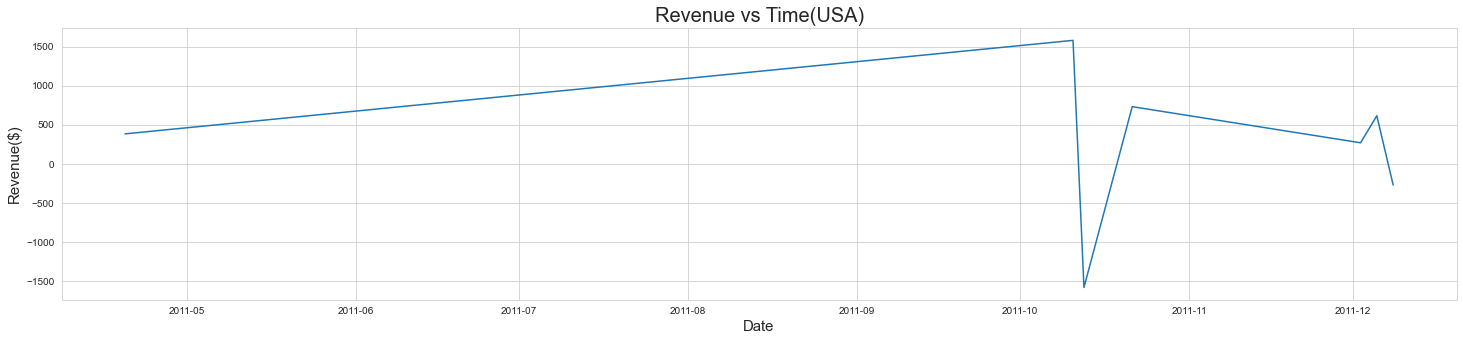

In [167]:
usaTR = usa.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(usaTR.index,usaTR)
plt.title("Revenue vs Time(USA)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### European Community

In [168]:
eu = data[data["Country"]=="European Community"]
eu.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.000000
mean,201106.114754,6.114754,4.540984,10.704918,8.147541,4.820492,15108.0,21.176230
std,1.096941,1.096941,1.858079,1.173943,6.546847,4.375808,0.0,11.514247
min,201104.000000,4.000000,1.000000,9.000000,-2.000000,0.550000,15108.0,-8.500000
25%,201106.000000,6.000000,4.000000,10.000000,3.000000,1.450000,15108.0,15.000000
50%,201106.000000,6.000000,4.000000,10.000000,6.000000,3.350000,15108.0,17.700000
75%,201107.000000,7.000000,7.000000,12.000000,12.000000,6.750000,15108.0,24.900000
max,201107.000000,7.000000,7.000000,16.000000,24.000000,18.000000,15108.0,60.000000


#### Revenue with time

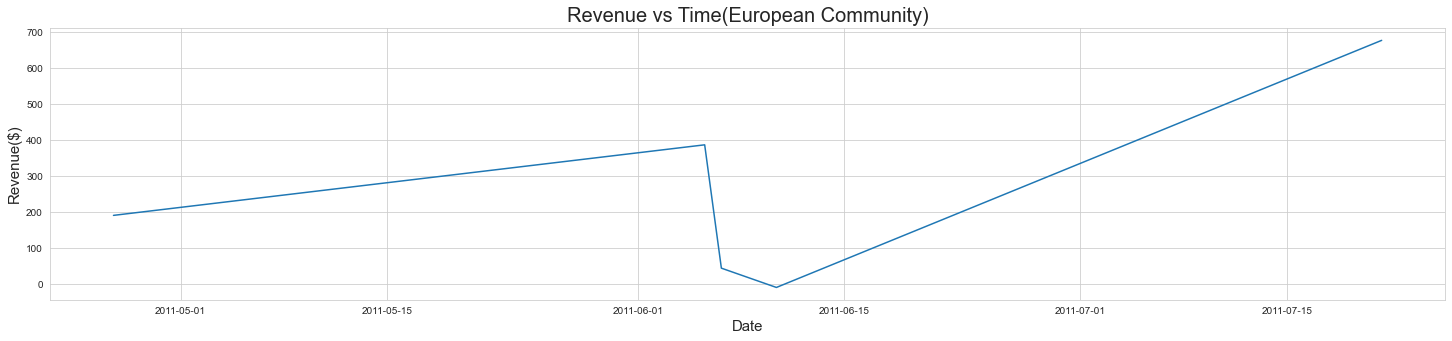

In [169]:
euTR = eu.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(euTR.index,euTR)
plt.title("Revenue vs Time(European Community)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Bahrain

In [170]:
bahrain = data[data["Country"]=="Bahrain"]
bahrain.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,17.0,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,201105.0,5.0,1.705882,13.941176,15.294118,4.644118,12354.529412,32.258824
std,0.0,0.0,1.311712,1.748949,24.959379,3.673634,0.874475,26.878478
min,201105.0,5.0,1.000000,13.000000,2.000000,1.250000,12353.000000,11.600000
25%,201105.0,5.0,1.000000,13.000000,6.000000,1.650000,12355.000000,17.700000
50%,201105.0,5.0,1.000000,13.000000,6.000000,2.950000,12355.000000,25.500000
75%,201105.0,5.0,1.000000,13.000000,8.000000,4.950000,12355.000000,30.000000
max,201105.0,5.0,4.000000,17.000000,96.000000,12.750000,12355.000000,120.000000


#### Revenue with time

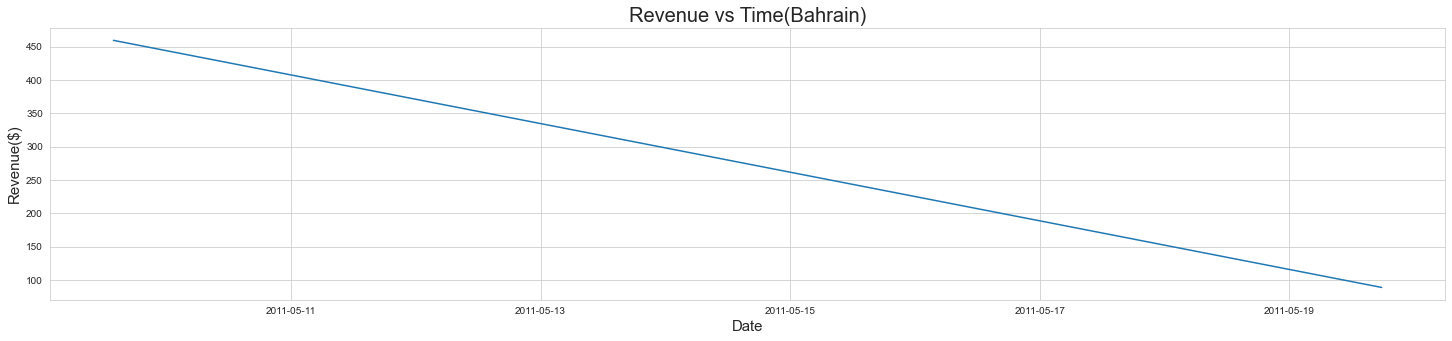

In [171]:
bahrainTR = bahrain.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(bahrainTR.index,bahrainTR)
plt.title("Revenue vs Time(Bahrain)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Malta

In [172]:
malta = data[data["Country"]=="Malta"]
malta.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,201107.842520,7.842520,2.275591,10.574803,7.433071,5.244173,16996.031496,19.728110
std,1.840571,1.840571,1.179704,2.815827,8.069726,9.380447,1127.519710,45.298451
min,201106.000000,6.000000,1.000000,8.000000,-4.000000,0.190000,15480.000000,-130.000000
25%,201106.000000,6.000000,1.000000,8.000000,3.000000,1.350000,15480.000000,11.050000
50%,201108.000000,8.000000,3.000000,9.000000,6.000000,2.950000,17828.000000,17.000000
75%,201108.000000,8.000000,3.000000,14.000000,12.000000,4.950000,17828.000000,19.800000
max,201112.000000,12.000000,4.000000,14.000000,48.000000,65.000000,17828.000000,455.000000


#### Revenue with time

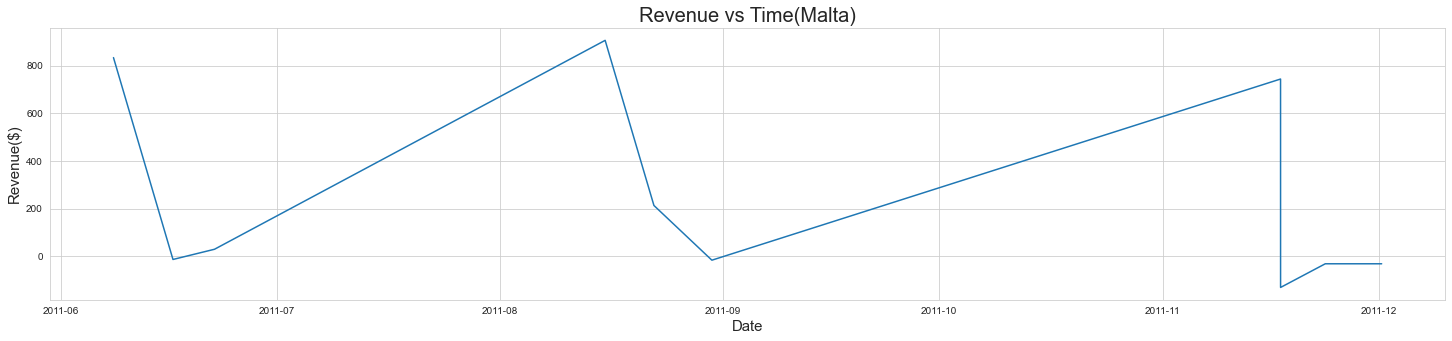

In [173]:
maltaTR = malta.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(maltaTR.index,maltaTR)
plt.title("Revenue vs Time(Malta)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Republic of South Africa

In [174]:
rsa = data[data["Country"]=="RSA"]
rsa.describe()

,year_month,month,day,hour,Quantity,UnitPrice,CustomerID,TotalCost
count,58.0,58.0,58.0,58.0,58.000000,58.000000,58.0,58.000000
mean,201110.0,10.0,4.0,12.0,6.068966,4.277586,12446.0,17.281207
std,0.0,0.0,0.0,0.0,3.329096,3.668432,0.0,6.490031
min,201110.0,10.0,4.0,12.0,1.000000,0.000000,12446.0,0.000000
25%,201110.0,10.0,4.0,12.0,3.000000,1.690000,12446.0,13.827500
50%,201110.0,10.0,4.0,12.0,6.000000,2.950000,12446.0,16.500000
75%,201110.0,10.0,4.0,12.0,9.500000,4.950000,12446.0,20.800000
max,201110.0,10.0,4.0,12.0,12.000000,14.950000,12446.0,38.250000


#### Revenue with time

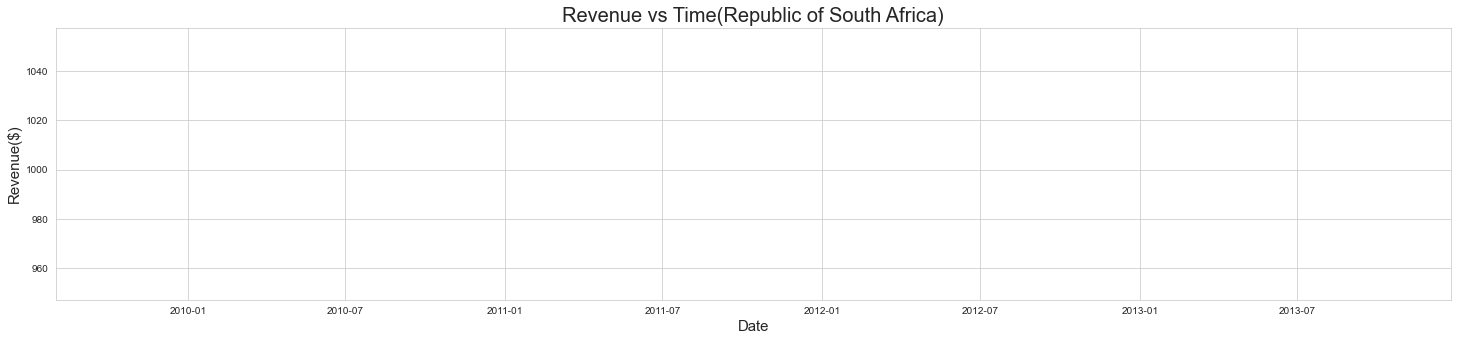

In [175]:
rsaTR = rsa.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(rsaTR.index,rsaTR)
plt.title("Revenue vs Time(Republic of South Africa)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Total revenue per country

In [176]:
df = data.copy()
RevData = pd.DataFrame(df.groupby("Country").TotalCost.sum().sort_values())
#have to rename axis label for it to make sense and ordering them for aesthetic purposes
RevData = RevData.rename(columns={"TotalCost":"Revenue"}).sort_values(by=["Revenue"], ascending=False)
RevData

,Revenue
Country,
United Kingdom,6758474.574
Netherlands,284520.690
EIRE,250228.220
Germany,221393.710
France,196638.440
Australia,137007.670
Switzerland,55699.800
Spain,54737.380
Belgium,40910.960


### Plotting it

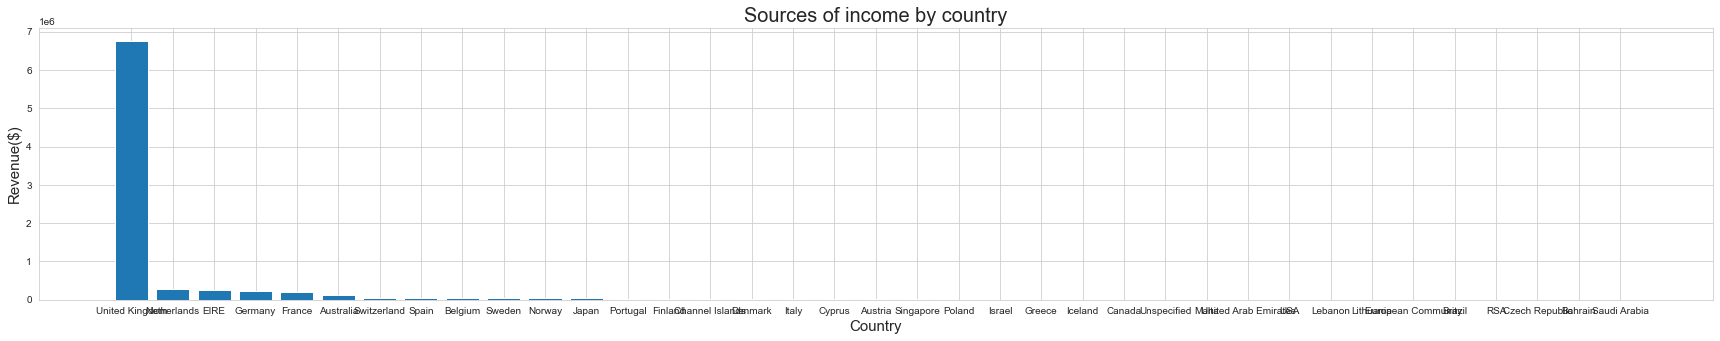

In [177]:
plt.rcParams['figure.figsize'] = [30, 5]
fig,ax = plt.subplots()
ax.bar(RevData.index,RevData["Revenue"])
plt.title("Sources of income by country", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Country", size=15)
plt.show()

Taking into account that the company in question is based in the UK, we can clearly see that most of its revenue is produced locally. Unfortunately, due to the large share of revenue produced locally, it is hard to appreciate from which country does most of their international revenue come from. i.e. What country has a greater share of their clients.

In [178]:
ExportRev = RevData.copy()
ExportRev = ExportRev.drop(index="United Kingdom")
ExportRev

,Revenue
Country,
Netherlands,284520.69
EIRE,250228.22
Germany,221393.71
France,196638.44
Australia,137007.67
Switzerland,55699.80
Spain,54737.38
Belgium,40910.96
Sweden,36595.91


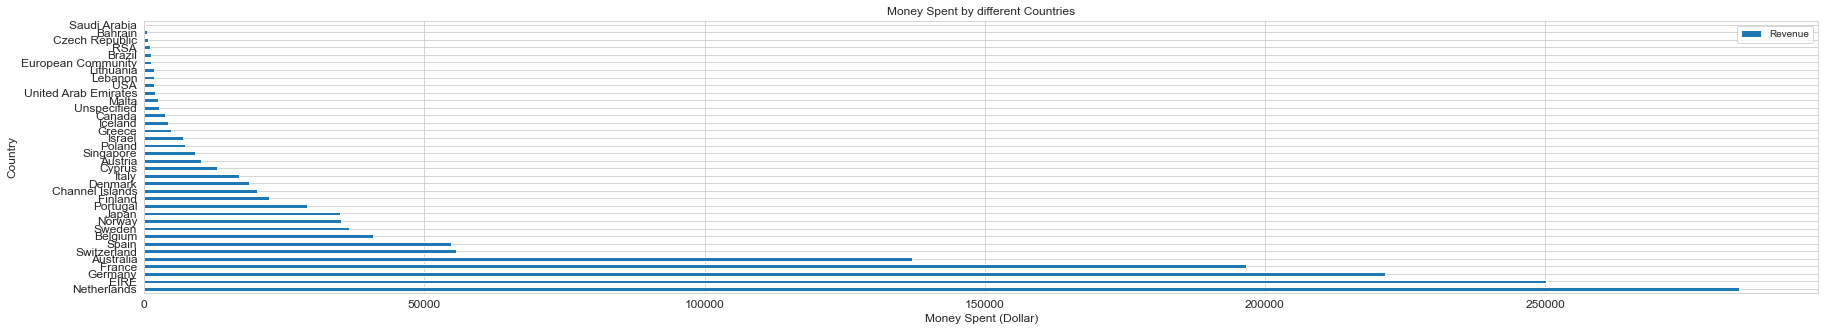

In [179]:
plt.rcParams['figure.figsize'] = [30, 5]
ExportRev.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

From this graph we can see that based solely on export revenue, their main international customer markets are:
1. Netherlands
2. Ireland
3. Germany
4. France
5. Australia

Exporting data for dashboard2

In [180]:
data.to_csv('../data/processed/DataForDash2/data2.csv', index = False)
RevData.to_csv('../data/processed/DataForDash2/revData.csv', index = False)
ExportRev.to_csv('../data/processed/DataForDash2/exportRev.csv', index = False)

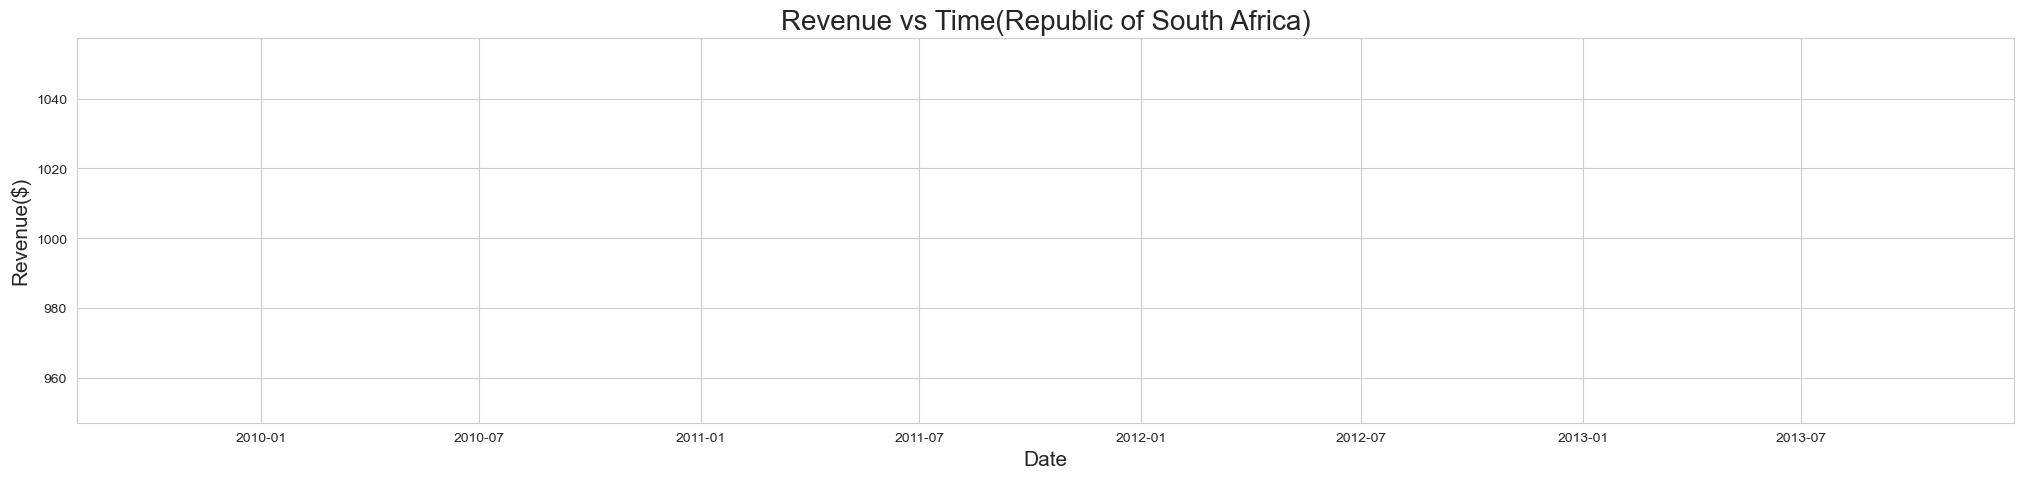

In [123]:
rsaTR = rsa.groupby("InvoiceDate").TotalCost.sum()

plt.rcParams['figure.figsize'] = [25, 5]

fig,ax = plt.subplots()
ax.plot(rsaTR.index,rsaTR)
plt.title("Revenue vs Time(Republic of South Africa)", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Date", size=15)
plt.show()

### Total revenue per country

In [135]:
df = data.copy()
RevData = pd.DataFrame(df.groupby("Country").TotalCost.sum().sort_values())
#have to rename axis label for it to make sense and ordering them for aesthetic purposes
RevData = RevData.rename(columns={"TotalCost":"Revenue"}).sort_values(by=["Revenue"], ascending=False)
RevData

,Revenue
Country,
United Kingdom,6758474.574
Netherlands,284520.690
EIRE,250228.220
Germany,221393.710
France,196638.440
Australia,137007.670
Switzerland,55699.800
Spain,54737.380
Belgium,40910.960


### Plotting it

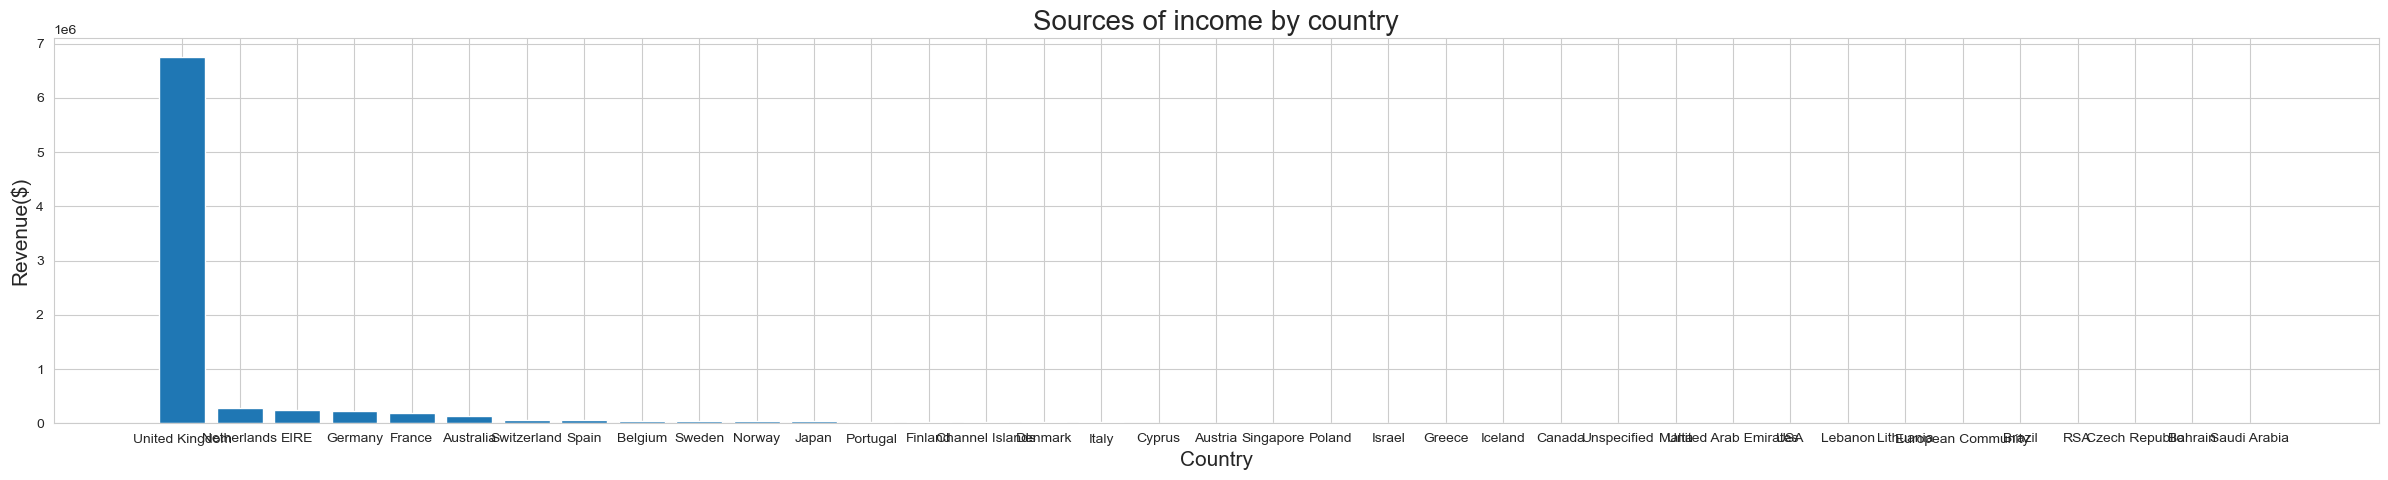

In [125]:
plt.rcParams['figure.figsize'] = [30, 5]
fig,ax = plt.subplots()
ax.bar(RevData.index,RevData["Revenue"])
plt.title("Sources of income by country", size=20)
plt.ylabel("Revenue($)", size=15)
plt.xlabel("Country", size=15)
plt.show()

Taking into account that the company in question is based in the UK, we can clearly see that most of its revenue is produced locally. Unfortunately, due to the large share of revenue produced locally, it is hard to appreciate from which country does most of their international revenue come from. i.e. What country has a greater share of their clients.

In [126]:
ExportRev = RevData.copy()
ExportRev = ExportRev.drop(index="United Kingdom")
ExportRev

,Revenue
Country,
Netherlands,284520.69
EIRE,250228.22
Germany,221393.71
France,196638.44
Australia,137007.67
Switzerland,55699.80
Spain,54737.38
Belgium,40910.96
Sweden,36595.91


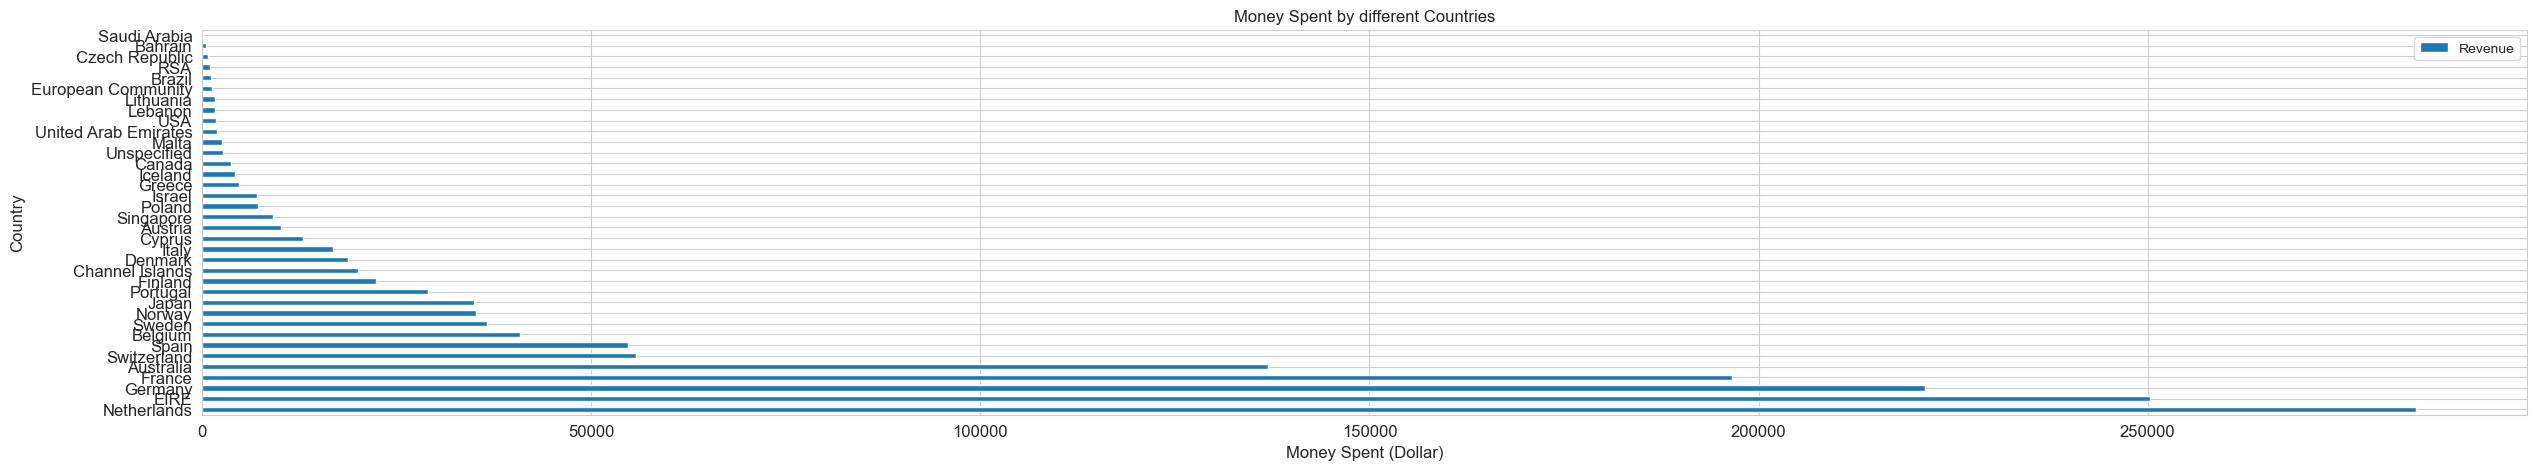

In [136]:
plt.rcParams['figure.figsize'] = [30, 5]
ExportRev.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

From this graph we can see that based solely on export revenue, their main international customer markets are:
1. Netherlands
2. Ireland
3. Germany
4. France
5. Australia

Exporting data for dashboard2

In [128]:
data.to_csv('../data/processed/DataForDash2/data2.csv', index = False)
RevData.to_csv('../data/processed/DataForDash2/revData.csv', index = False)
ExportRev.to_csv('../data/processed/DataForDash2/exportRev.csv', index = False)